In [139]:

# Importing required libraries
import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import geopandas as gpd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from statsmodels.tsa.seasonal import seasonal_decompose
from keras.utils.vis_utils import plot_model

In [140]:
%matplotlib inline

# general
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Geographical analysis
import geopandas as gpf #libspatialindex nees to be installed first
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import shapefile as shp
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import requests
import descartes

# Datetime
from datetime import datetime, date, timedelta

# accessibility analysis
import time
from pandana.loaders import osm
from pandana.loaders import pandash5

# modelling
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

#Hide warnings
import warnings
warnings.filterwarnings('ignore')

# Set plot preference
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

print('Libraries imported.')

Libraries imported.


In [141]:
r_df = pd.read_csv('data/man/listings.csv')
print(f"Dataset contains {len(r_df)} airbnb listings")
pd.set_option('display.max_columns', len(r_df.columns))
pd.set_option('display.max_rows', 100)
r_df.head(3)

Dataset contains 5128 airbnb listings


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,68951,https://www.airbnb.com/rooms/68951,20200317143817,2020-03-17,Whole House for rent,Complete House with all mod cons and just next...,Separate House attached to our own home - cons...,Complete House with all mod cons and just next...,none,NaN,NaN,"Close to local rail, bus and motorway links",NaN,We live next door so are on hand if you need a...,Recommended occupancy is max 4 people No Smoki...,NaN,NaN,https://a0.muscache.com/im/pictures/4144487/c4...,NaN,341682,https://www.airbnb.com/users/show/341682,Paul & Della,2011-01-10,"Bolton, England, United Kingdom",We really enjoy hosting people and we can't wa...,within a few hours,100%,57%,t,https://a0.muscache.com/im/users/341682/profil...,https://a0.muscache.com/im/users/341682/profil...,NaN,1,1,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Westhoughton, England, United Kingdom",NaN,Bolton District,Bolton,Westhoughton,England,BL5 3,Manchester,"Westhoughton, United Kingdom",GB,United Kingdom,53.56214,-2.53305,t,House,Entire home/apt,4,1.0,2.0,6.0,Real Bed,"{TV,Wifi,Kitchen,""Free street parking"",""Indoor...",NaN,$65.00,$350.00,"$1,051.00",$150.00,$25.00,4,$10.00,2,180,2,2,180,180,2.0,180.0,6 days ago,t,0,0,0,136,2020-03-17,82,6,2012-03-12,2019-10-03,97.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,t,1,1,0,0,0.84
1,85109,https://www.airbnb.com/rooms/85109,20200317143817,2020-03-17,"Best Location! !, WIFI, En-suite, Balcony!",**PLEASE NOTE** This listing is not an entire...,PLEASE NOTE - THIS LISTING IS NOT AN ENTIRE AP...,**PLEASE NOTE** This listing is not an entire...,none,We are situated right in the middle of Manches...,PLEASE NOTE - IF YOU INTEND TO CHECK IN AFTER ...,Manchester City Centre is compact and therefor...,During your stay you will have private access ...,We have as much or as little interaction with ...,We want your stay with us to be as enjoyable a...,NaN,NaN,https://a0.muscache.com/im/pictures/24191245/f...,NaN,465854,https://www.airbnb.com/users/show/465854,Karyo,2011-03-27,"Manchester, United Kingdom",\r\n\r\nFriendly male couple with room to let...,within an hour,100%,97%,t,https://a0.muscache.com/im/pictures/user/e4db4...,https://a0.muscache.com/im/pictures/user/e4db4...,NaN,4,4,"['email', 'phone', 'reviews', 'j

# Datan siivoaminen

Datasta voidaan aluksi siivota selkeästi ainakin tekstikentät jne., sillä en tule analyysissä käyttämään NLP-menetelmiä

In [142]:
pudotettavat_sarakkeet = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'neighbourhood', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped', 'host_acceptance_rate', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price', 'monthly_price', 'license', 'jurisdiction_names', 'host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', ]
df = r_df.drop(pudotettavat_sarakkeet, axis=1)
#df.set_index('id', inplace=True)
lat_long = df[['latitude', 'longitude']]
df.drop(['zipcode', 'latitude', 'longitude', 'street', 'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact'], axis=1, inplace=True)
df.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)
df.drop(['calendar_updated'], axis=1, inplace=True)
df.drop(['number_of_reviews_ltm', 'reviews_per_month'], axis=1, inplace=True)

In [143]:
df.isna().sum()

id                                     0
experiences_offered                    0
host_since                             0
host_response_time                  1073
host_response_rate                  1073
host_is_superhost                      0
host_listings_count                    0
host_has_profile_pic                   0
host_identity_verified                 0
neighbourhood_cleansed                 0
property_type                          0
room_type                              0
accommodates                           0
bathrooms                              3
bedrooms                               2
beds                                  52
bed_type                               0
amenities                              0
price                                  0
security_deposit                    1774
cleaning_fee                        1276
guests_included                        0
extra_people                           0
minimum_nights                         0
maximum_nights  

In [144]:
df.head()

,id,experiences_offered,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,68951,none,2011-01-10,within a few hours,100%,t,1,t,t,Bolton District,House,Entire home/apt,4,1.0,2.0,6.0,Real Bed,"{TV,Wifi,Kitchen,""Free street parking"",""Indoor...",$65.00,$150.00,$25.00,4,$10.00,2,180,t,0,0,0,136,82,2012-03-12,2019-10-03,97.0,10.0,9.0,10.0,10.0,9.0,9.0,f,f,f,strict_14_with_grace_period,f,t
1,85109,none,2011-03-27,within an hour,100%,t,4,t,t,City Centre,Apartment,Private room,2,1.5,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",$60.00,$0.00,$0.00,2,$0.00,2,14,t,30,60,88,355,434,2011-05-02,2020-03-16,97.0,10.0,10.0,10.0,10.0,10.0,9.0,f,f,f,strict_14_with_grace_period,f,f
2,157612,none,2011-06-29,within a few hours,90%,t,3,t,f,Salford District,Loft,Entire home/apt,3,1.0,2.0,2.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",$34.00,$150.00,$20.00,1,$14.00,2,365,t,9,21,47,322,96,2012-02-13,2019-12-08,98.0,10.0,10.0,10.0,10.0,9.0,10.0,f,f,f,moderate,t,t
3,159189,none,2011-06-30,NaN,NaN,f,1,t,f,Rochdale District,House,Shared room,2,1.0,1.0,2.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",$55.00,$100.00,NaN,1,$30.00,1,3,t,30,60,90,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,f,flexible,f,f
4,283495,none,2011-12-06,within a few hours,100%,f,1,t,f,Rochdale District,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Free parking on p...",$60.00,NaN,NaN,1,$0.00,3,1125,t,0,0,0,240,10,2015-04-26,2018-08-05,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,flexible,f,f


In [152]:
#df['price'] = df.price.str.replace("\$|,",'').astype(float)
#df.set_index('id', inplace=True)

In [153]:
df.head()

,id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy
0,68951,2011-01-10,within a few hours,100%,1,1,1,Bolton District,House,Entire home/apt,4,1.0,2.0,6.0,Real Bed,"{TV,Wifi,Kitchen,""Free street parking"",""Indoor...",$65.00,$150.00,$25.00,4,$10.00,2,180,0,0,0,136,82,2012-03-12,2019-10-03,97.0,10.0,9.0,10.0,10.0,9.0,9.0,0,strict_14_with_grace_period
1,85109,2011-03-27,within an hour,100%,1,4,1,City Centre,Apartment,Private room,2,1.5,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",$60.00,$0.00,$0.00,2,$0.00,2,14,30,60,88,355,434,2011-05-02,2020-03-16,97.0,10.0,10.0,10.0,10.0,10.0,9.0,0,strict_14_with_grace_period
2,157612,2011-06-29,within a few hours,90%,1,3,0,Salford District,Loft,Entire home/apt,3,1.0,2.0,2.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",$34.00,$150.00,$20.00,1,$14.00,2,365,9,21,47,322,96,2012-02-13,2019-12-08,98.0,10.0,10.0,10.0,10.0,9.0,10.0,0,moderate
3,159189,2011-06-30,NaN,NaN,0,1,0,Rochdale District,House,Shared room,2,1.0,1.0,2.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",$55.00,$100.00,NaN,1,$30.00,1,3,30,60,90,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible
4,283495,2011-12-06,within a few hours,100%,0,1,0,Rochdale District,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Free parking on p...",$60.00,NaN,NaN,1,$0.00,3,1125,0,0,0,240,10,2015-04-26,2018-08-05,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,flexible


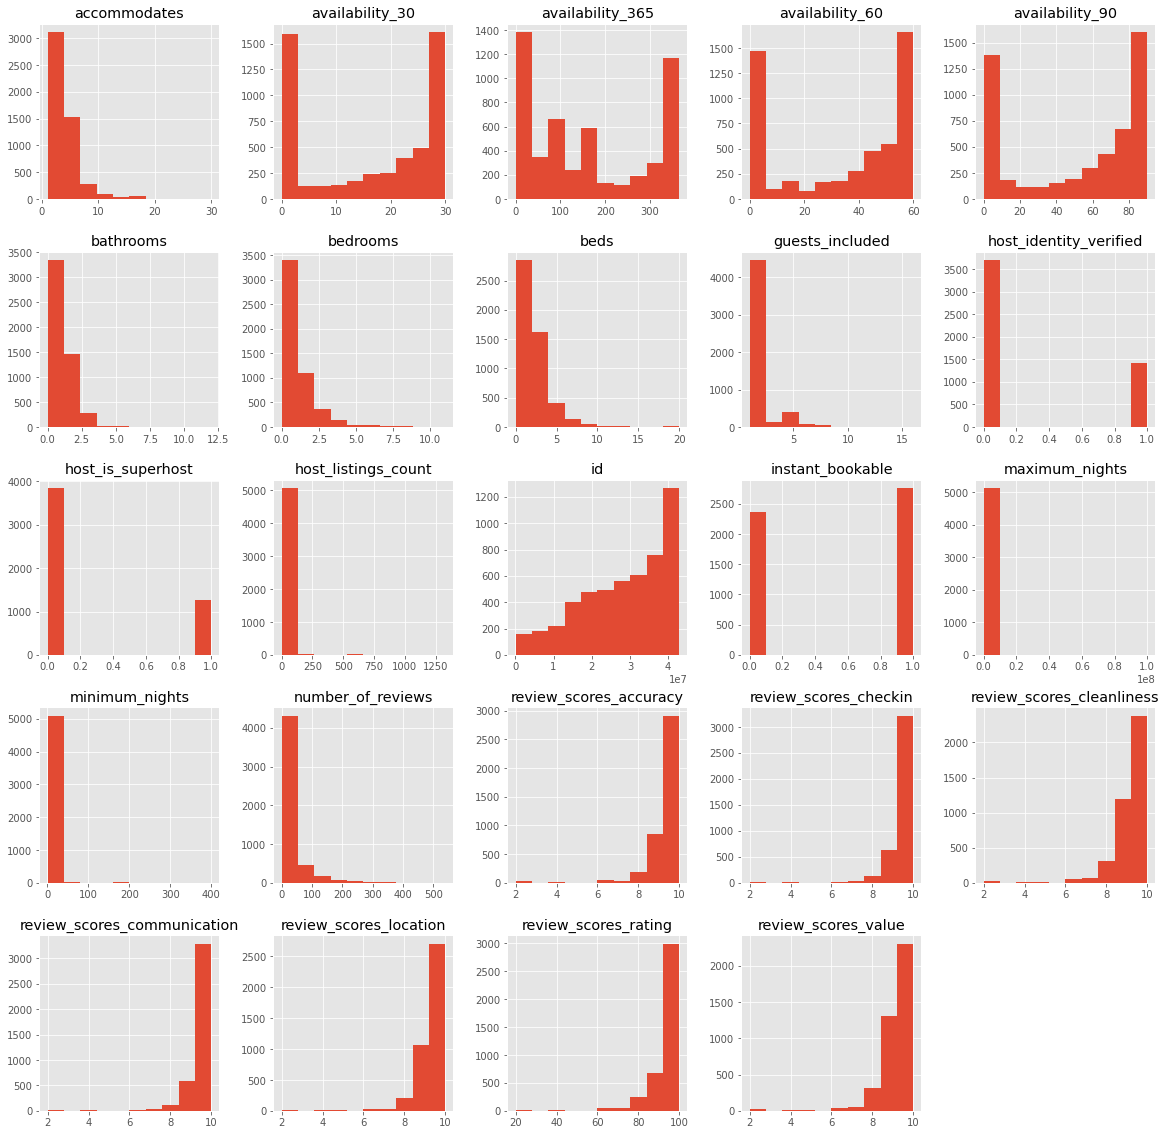

In [154]:
# Replacing Boolean values with 0s and 1s
df.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20));

Kuten yläpuolelta nähdään, monessa sarakkeessa on tietoja, joista kaikki/valtaosa on Epätotta / totta, jolloin näistä voidaan luopua. Tällaisia ovat ainakin:

In [155]:
df.drop(['has_availability', 'host_has_profile_pic', 'is_business_travel_ready', 'require_guest_phone_verification', 'require_guest_profile_picture', 'requires_license'], axis=1, inplace=True)

KeyError: "['has_availability' 'host_has_profile_pic' 'is_business_travel_ready'\n 'require_guest_phone_verification' 'require_guest_profile_picture'\n 'requires_license'] not found in axis"

In [ ]:
# Jos kaikki ovat None, ei tälläkään sarakkeella tehdä mitään
df.experiences_offered.value_counts()

In [ ]:
df.drop('experiences_offered', axis=1, inplace=True)

## bathrooms, bedrooms and beds

Misssing values replaced by medians

In [156]:
for col in ['bathrooms', 'bedrooms', 'beds']:
    df[col].fillna(df[col].median(), inplace=True)

In [157]:
df.bed_type.value_counts()

# Kaikki samaa tyyppiä, joten tästä voidaan luopua
df.drop('bed_type', axis=1, inplace=True)

## Creating column host_days_active

**Missing values are added from median** of **host_days_active**

In [158]:
# Converting to datetime
df.host_since = pd.to_datetime(df.host_since) 

# Calculating the number of days
df['host_days_active'] = (datetime(2019, 4, 9) - df.host_since).astype('timedelta64[D]')

# Printing mean and median
print("Mean days as host:", round(df['host_days_active'].mean(),0))
print("Median days as host:", df['host_days_active'].median())

# Replacing null values with the median
df.host_days_active.fillna(df.host_days_active.median(), inplace=True)

Mean days as host: 842.0
Median days as host: 807.5


In [159]:

df.host_response_time.fillna("unknown", inplace=True)
df.host_response_time.value_counts(normalize=True)

within an hour        0.612324
unknown               0.209243
within a few hours    0.104134
within a day          0.058502
a few days or more    0.015796
Name: host_response_time, dtype: float64

#### hsot Response rate

In [160]:
# Removing the % sign from the host_response_rate string and converting to an integer
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')

In [161]:

# Removing the % sign from the host_response_rate string and converting to an integer
#df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')

print("Mean host response rate:", round(df['host_response_rate'].mean(),0))
print("Median host response rate:", df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")

Mean host response rate: 95.0
Median host response rate: 100.0
Proportion of 100% host response rates: 74.8%


### Binnin response_rate

In [162]:

# Bin into four categories
df.host_response_rate = pd.cut(df.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

In [163]:
# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

100%       3035
unknown    1073
50-89%      555
90-99%      358
0-49%       107
Name: host_response_rate, dtype: int64

In [164]:
df.isnull().sum()

id                                0
host_since                        0
host_response_time                0
host_response_rate                0
host_is_superhost                 0
host_listings_count               0
host_identity_verified            0
neighbourhood_cleansed            0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
amenities                         0
price                             0
security_deposit               1774
cleaning_fee                   1276
guests_included                   0
extra_people                      0
minimum_nights                    0
maximum_nights                    0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review                

## host_is_superhost

In [165]:
# Onnistunut tai ei ongelma
#3
#len(df[df.loc[ :,['host_since ', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified'] ].isnull().sum(axis=1) == 5])

df.dropna(subset=['host_since'], inplace=True)

In [166]:
#df.dropna(subset=['host_since'], inplace=True)

## property_type

Cleaning property types is required

The categories / classifications that will be used

 * apartment
 * house
 * other


In [167]:
df.property_type.value_counts()

Apartment             2149
House                 2033
Townhouse              309
Condominium            152
Serviced apartment      87
Bed and breakfast       53
Guesthouse              52
Cottage                 49
Loft                    44
Hotel                   39
Guest suite             36
Bungalow                28
Aparthotel              15
Boat                    11
Boutique hotel          10
Campsite                 9
Farm stay                8
Camper/RV                8
Houseboat                6
Other                    6
Villa                    6
Tiny house               5
Chalet                   4
Hostel                   2
Barn                     2
Hut                      2
Cabin                    2
Tent                     1
Name: property_type, dtype: int64

In [168]:
# Replacing categories that are types of houses or apartments
df.property_type.replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House'  
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

## amenities

In [169]:
# Example of amenities listed
df.amenities[:1].values

## Creating the set of all possible amenities

# Creating a set of all possible amenities
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Baking sheet',
 'Barbecue utensils',
 'Bath towel',
 'Bathroom essentials',
 'Bathtub',
 'Beach essentials',
 'Bed linens',
 'Bedroom comforts',
 'Body soap',
 'Bread maker',
 'Breakfast',
 'Building staff',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Convection oven',
 'Cooking basics',
 'Crib',
 'DVD player',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Double oven',
 'Dryer',
 'EV charger',
 'Elevator',
 'En suite bathroom',
 'Espresso machine',
 'Essentials',
 'Ethernet connection',
 'Extra pillows and blankets',
 'Extra space around bed',
 'Family/kid friendly',
 'Fire extinguisher',
 'Fireplace guar

In [170]:
df.loc[df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
df.loc[df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
df.loc[df['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

### Removing infrequent amenities

In [171]:

# Replacing nulls with zeros for new columns
cols_to_replace_nulls = df.iloc[:,41:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in df.iloc[:,41:].columns:
    if df[col].sum() < len(df)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
df.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
df.drop('amenities', axis=1, inplace=True)

['high_end_electronics', 'bbq', 'nature_and_views', 'gym', 'hot_tub_sauna_or_pool', 'secure', 'smoking_allowed', 'accessible', 'event_suitable']


In [172]:
df.columns[40:]

Index(['balcony', 'bed_linen', 'breakfast', 'tv', 'coffee_machine',
       'cooking_basics', 'white_goods', 'elevator', 'child_friendly',
       'parking', 'outdoor_space', 'host_greeting', 'internet',
       'long_term_stays', 'pets_allowed', 'private_entrance', 'self_check_in'],
      dtype='object')

In [173]:
df.price = df.price.str[1:-3]
df.price = df.price.str.replace(",", "")
df.price = df.price.astype('int64')

In [174]:
df.price

0        65
1        60
2        34
3        55
4        60
       ... 
5123    500
5124     30
5125     40
5126    693
5127    500
Name: price, Length: 5128, dtype: int64

### security_deposit


In [175]:


df.security_deposit.isna().sum()


1774

In [36]:
df.security_deposit

0       $150.00
1         $0.00
2       $150.00
3       $100.00
4           NaN
         ...   
5123      $0.00
5124        NaN
5125        NaN
5126        NaN
5127      $0.00
Name: security_deposit, Length: 5128, dtype: object

In [37]:
df.security_deposit = df.security_deposit.str[1:-3]
df.security_deposit = df.security_deposit.str.replace(",", "")
df.security_deposit.fillna(0, inplace=True)
df.security_deposit = df.security_deposit.astype('int64')

In [176]:
df.security_deposit

0       $150.00
1         $0.00
2       $150.00
3       $100.00
4           NaN
         ...   
5123      $0.00
5124        NaN
5125        NaN
5126        NaN
5127      $0.00
Name: security_deposit, Length: 5128, dtype: object

### cleaning_fee

In [177]:
df.cleaning_fee.isna().sum()

1276

In [178]:
df.cleaning_fee

0       $25.00
1        $0.00
2       $20.00
3          NaN
4          NaN
         ...  
5123     $0.00
5124       NaN
5125       NaN
5126       NaN
5127     $0.00
Name: cleaning_fee, Length: 5128, dtype: object

In [179]:
df.cleaning_fee = df.cleaning_fee.str[1:-3]
df.cleaning_fee = df.cleaning_fee.str.replace(",", "")
df.cleaning_fee.fillna(0, inplace=True)
df.cleaning_fee = df.cleaning_fee.astype('int64')

In [180]:

df.extra_people = df.extra_people.str[1:-3]
df.extra_people = df.extra_people.str.replace(",", "")
df.extra_people.fillna(0, inplace=True)
df.extra_people = df.extra_people.astype('int64')

### calendar updated --- Ei muuten taida löytyä edes datasetistä

There are 96 unique categories for calendar_updated, and it is not entirely clear what this feature is adding to the model (a host might update their calendar for multiple different reasons). Therefore this column will be dropped.

In [181]:
#print("Number of categories:", df.calendar_updated.nunique())
#print("\nTop five categories:")
#df.calendar_updated.value_counts()[:5]

In [182]:
#df.drop('calendar_updated', axis=1, inplace=True)

### Eli yläpuolelta calendar updated -kohdasta tähän asti voi tuhota, kai

### availability

In [183]:
df.drop(['availability_30', 'availability_60', 'availability_365'], axis=1, inplace=True)

# FIRST AND LAST REVIEW

In [184]:
print(f"Null values in 'first_review': {round(100*df.first_review.isna().sum()/len(df),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*df.review_scores_rating .isna().sum()/len(df),1)}%")

Null values in 'first_review': 19.1%
Null values in 'review_scores_rating': 20.6%


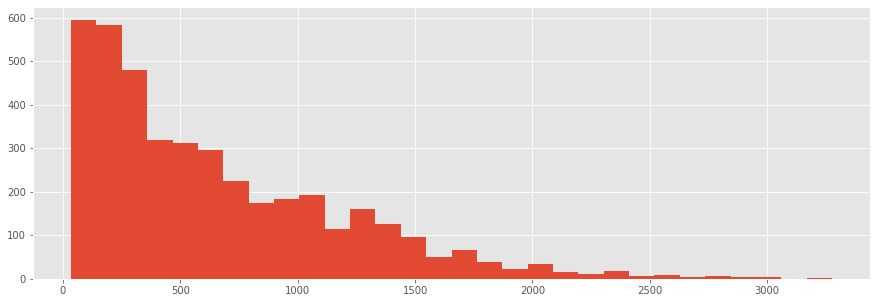

In [185]:
df.first_review = pd.to_datetime(df.first_review)
# time since first review
df['time_since_first_review'] = (datetime(2020, 4, 20) - df.first_review).astype('timedelta64[D]')

# Histogram
df.time_since_first_review.hist(figsize=(15,5), bins=30)

In [186]:
def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].fillna(na_label, inplace=True)

In [187]:
# bin time since first_review
bin_column('time_since_first_review',
          bins=[0, 182, 365, 730, 1460, max(df.time_since_first_review)],
          labels=['0-6 months',
                 '6-12 months',
                 '1-2 years',
                 '2-3 years',
                 '4+ years'])

In [188]:
df.last_review = pd.to_datetime(df.last_review)

# Days since the latest review
df['time_since_last_review'] = (datetime(2020, 4, 20) - df.last_review).astype('timedelta64[D]')

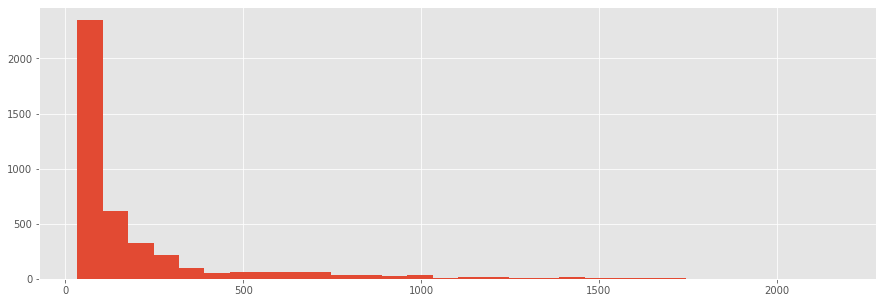

In [189]:
# Distribution of days since last review
df.time_since_last_review.hist(figsize=(15,5), bins=30)

In [190]:
# Bins of time since last review
bin_column('time_since_last_review',
          bins=[0, 14, 60, 182, 365, max(df.time_since_last_review)],
          labels=['0-2 weeks',
                 '2-8 weeks',
                 '2-6 months',
                 '6-12 months',
                 '1+ year'],
          na_label='no reviews')

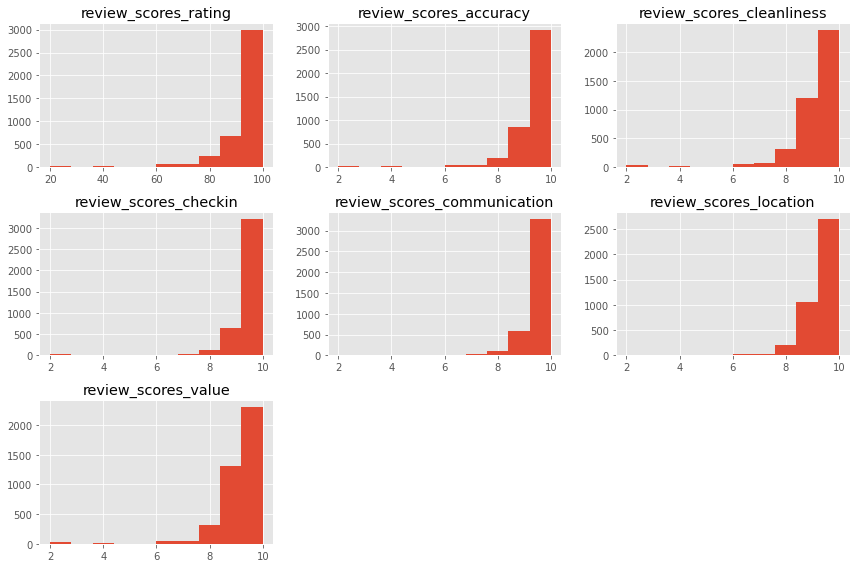

In [191]:
# distributions pf review ratings
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [192]:
# Ainoa, jonka asteikko 0-100
variables_to_plot.pop(0)

'review_scores_rating'

In [193]:
# Binning for all columns scored 0-10
for col in variables_to_plot:
    bin_column(col,
               bins=[0, 8, 9, 10],
               labels=['0-8/10', '9/10', '10/10'],
               na_label='no reviews')

In [194]:
# review_scores_rating'in, ts. ainoan 0-100 välillä olleen asteikon binnaus
bin_column('review_scores_rating',
           bins=[0, 80, 95, 100],
           labels=['0-79/100', '80-94/100', '95-100/100'],
           na_label='no reviews')

# Cancellation policy

In [195]:
df.cancellation_policy.value_counts()

strict_14_with_grace_period    1950
flexible                       1759
moderate                       1367
super_strict_30                  37
super_strict_60                  15
Name: cancellation_policy, dtype: int64

In [196]:
df.cancellation_policy.replace({
    'super_strict_30': 'strict_14_with_grace_period',
    'super_strict_60': 'strict_14_with_grace_period',
    'strict': 'strict_14_with_grace_period',
    'luxury_moderate': 'moderate'
    }, inplace=True)

In [197]:
df.cancellation_policy.value_counts()

strict_14_with_grace_period    2002
flexible                       1759
moderate                       1367
Name: cancellation_policy, dtype: int64

# **Exploratory Data Analysis**

## Voisi esimerkiksi pohtia, kuinka monta asunnonvuokraajaa on vielä jäljellä ensimmäise


In [198]:
#print(f"Airbnb:hen liittyneistä asunnonvuokraajista, jotka ovat sivulla edelleen käyttäjinä ja jotka liittyivät {min(df.host_since).strftime('%d %B %Y')} ja käyttäjiksi viimeisimpänä liittyneet ovat tehneet niin {max(df.host_since).strftime('%d %B %Y')}.")
#print(f"Of the Airbnb hosts that are still listing on the site, the first joined on {min(df.host_since).strftime('%d %B %Y')}, and the most recent joined on {max(df.host_since).strftime('%d %B %Y')}.")

In [199]:
#plt.figure(figsize=(15,5))
from datetime import datetime, timedelta, date

In [200]:
#plt.figure(figsize=(15,5))
#df.set_index('host_since').resample('MS').size().plot(label='Hosts joining Airbnb', color='orange')
#df.set_index('first_review').resample('MS').size().plot(label='Listings getting their first review', color='green')
#plt.title('London hosts joining Airbnb and listings getting their first review in each month')
##plt.legend()
#plt.xlim('2008-08-01', '2019-03-31') # Limiting to whole months
#plt.xlabel('')
#plt.ylabel('')
#plt.show()

In [201]:
# Creating dataframes for time series analysis
#ts_host_since = pd.DataFrame(df.set_index('host_since').resample('MS').size())
#ts_first_review = pd.DataFrame(df.set_index('first_review').resample('MS').size())

# Renaming columns
#ts_host_since = ts_host_since.rename(columns={0: 'hosts'})
#ts_host_since.index.rename('month', inplace=True)
#ts_first_review = ts_first_review.rename(columns={0: 'reviews'})
#ts_first_review.index.rename('month', inplace=True)

In [202]:
df.first_review = pd.to_datetime(df.first_review) # Converting to datetime
df['time_since_first_review'] = (pd.datetime(2020, 4, 20) - df.first_review).astype('timedelta64[D]')

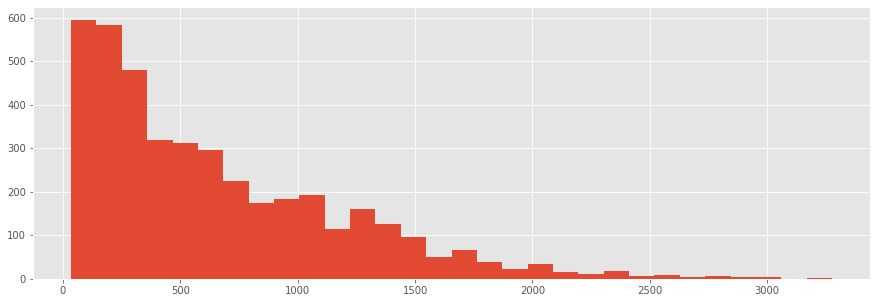

In [203]:
# Distribution of the number of days since first review
df.time_since_first_review.hist(figsize=(15,5), bins=30);

In [204]:
# Binning time since first review
bin_column('time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(df.time_since_first_review)],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews')

In [205]:
# Sama juttu mutta last_review'lle

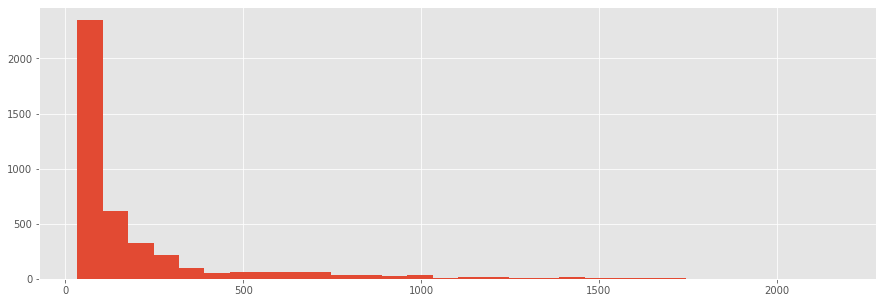

In [206]:
df.last_review = pd.to_datetime(df.last_review) # Converting to datetime

# Calculating the number of days between the most recent review and the date the data was scraped
df['time_since_last_review'] = (pd.datetime(2020, 4, 20) - df.last_review).astype('timedelta64[D]')

# Distribution of the number of days since last review
df.time_since_last_review.hist(figsize=(15,5), bins=30);

In [207]:
# Dropping last_review - first_review will be kept for EDA and dropped later
df.drop('last_review', axis=1, inplace=True)

In [208]:
df.head()

,id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_90,number_of_reviews,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,host_days_active,check_in_24h,air_conditioning,balcony,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,child_friendly,parking,outdoor_space,host_greeting,internet,long_term_stays,pets_allowed,private_entrance,self_check_in,time_since_first_review,time_since_last_review
0,68951,2011-01-10,within a few hours,100%,1,1,1,Bolton District,House,Entire home/apt,4,1.0,2.0,6.0,65,$150.00,25,4,10,2,180,0,82,2012-03-12,95-100/100,10/10,9/10,10/10,10/10,9/10,9/10,0,strict_14_with_grace_period,3011.0,NaN,NaN,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,4+ years,200.0
1,85109,2011-03-27,within an hour,100%,1,4,1,City Centre,Apartment,Private room,2,1.5,1.0,1.0,60,$0.00,0,2,0,2,14,88,434,2011-05-02,95-100/100,10/10,10/10,10/10,10/10,10/10,9/10,0,strict_14_with_grace_period,2935.0,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4+ years,35.0
2,157612,2011-06-29,within a few hours,50-89%,1,3,0,Salford District,Apartment,Entire home/apt,3,1.0,2.0,2.0,34,$150.00,20,1,14,2,365,47,96,2012-02-13,95-100/100,10/10,10/10,10/10,10/10,9/10,10/10,0,moderate,2841.0,1.0,NaN,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4+ years,134.0
3,159189,2011-06-30,unknown,unknown,0,1,0,Rochdale District,House,Shared room,2,1.0,1.0,2.0,55,$100.00,0,1,30,1,3,90,0,NaT,nan,nan,nan,nan,nan,nan,nan,0,flexible,2840.0,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,nan,NaN
4,283495,2011-12-06,within a few hours,100%,0,1,0,Rochdale District,House,Private room,2,1.0,1.0,1.0,60,NaN,0,1,0,3,1125,0,10,2015-04-26,95-100/100,10/10,10/10,10/10,10/10,10/10,10/10,0,flexible,2681.0,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,4+ years,624.0


# Saving and reading the cleaned dataset --- VÄLIMUOTO TALLESSA, TÄHÄN VOI AINA PALATA

In [209]:
# Save cleaned dataset
listings_cleaned = df.to_csv(r'data/listings_cleaned_manchester.csv', index=id, header=True)
df = pd.read_csv('data/listings_cleaned_manchester.csv', index_col=0)

In [214]:
# Tuottanut aina errorin
#print(f"Of the Airbnb hosts that are still listing on the site, the first joined on {min(df.host_since).strftime('%d %B %Y')}, and the most recent joined on {max(df.host_since).strftime('%d %B %Y')}.")

In [211]:
df['host_since'] = pd.to_datetime(df['host_since'])
df['first_review'] = pd.to_datetime(df['first_review'])

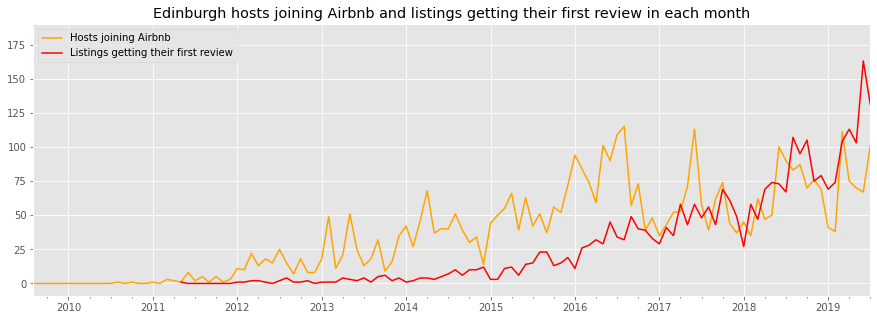

In [215]:
plt.figure(figsize=(15,5))
df.set_index('host_since').resample('MS').size().plot(label='Hosts joining Airbnb', color='orange')
df.set_index('first_review').resample('MS').size().plot(label='Listings getting their first review', color='red')
plt.title('Edinburgh hosts joining Airbnb and listings getting their first review in each month')
plt.legend()
plt.xlim('2009-08-21', '2019-07-20') # Limiting to whole months
plt.xlabel('')
plt.ylabel('')
plt.show()

In [216]:
# Creating dataframes for time series analysis
ts_host_since = pd.DataFrame(df.set_index('host_since').resample('MS').size())
ts_first_review = pd.DataFrame(df.set_index('first_review').resample('MS').size())

# Renaming columns
ts_host_since = ts_host_since.rename(columns={0: 'hosts'})
ts_host_since.index.rename('month', inplace=True)
ts_first_review = ts_first_review.rename(columns={0: 'reviews'})
ts_first_review.index.rename('month', inplace=True)

In [217]:
def decompose_time_series(df, title=''):
    """
    Plots the original time series and its decomposition into trend, seasonal and residual.
    """
    # Decomposing the time series
    decomposition = seasonal_decompose(df)
    
    # Getting the trend, seasonality and noise
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    # Plotting the original time series and the decomposition
    plt.figure(figsize=(12,8))
    plt.suptitle(title, fontsize=14, y=1)
    plt.subplots_adjust(top=0.80)
    plt.subplot(411)
    plt.plot(df, label='Original')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='upper left')
    plt.tight_layout()

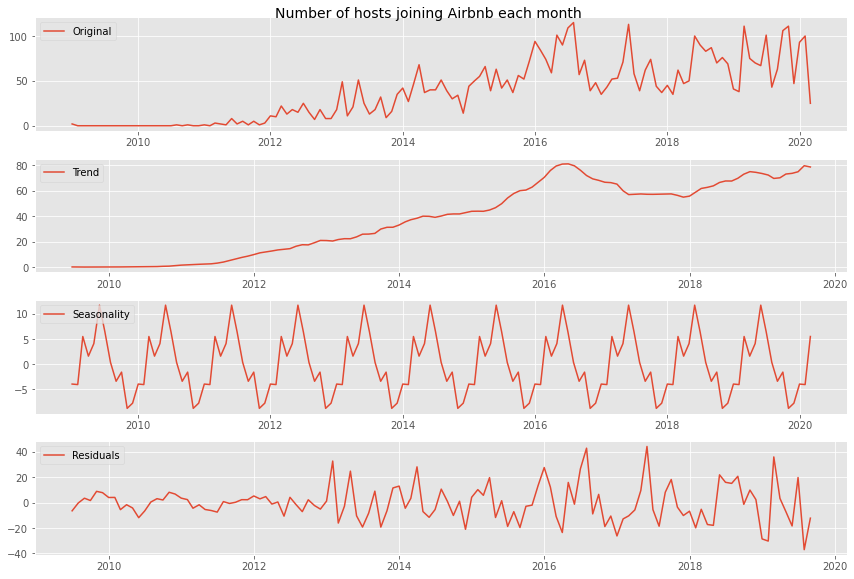

In [218]:
decompose_time_series(ts_host_since, title='Number of hosts joining Airbnb each month')

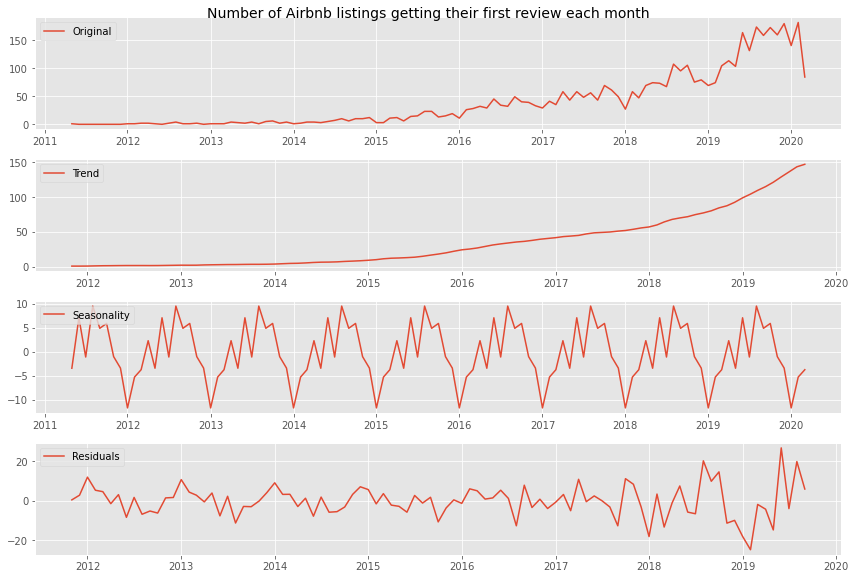

In [219]:
decompose_time_series(ts_first_review, title='Number of Airbnb listings getting their first review each month')

As seen above, there is a clear seasonality. Every year, you see a peak towards hosts joining around the middle of the year (summer), and the lowest points are the beginning and the end of each year. There is a big peak in the number of hosts joining Airbnb between 2015 and 2016. Indeed, there has been a fast growth of Airbnb since middle 2015. This was the year when Airbnb became increasingly popular for short-term lease, as a way to get around local legislation and taxation. The same trend was observed in London, however, in London, the introduction of the 90-day rule for short-term rentals is another variable to consider. That legislation did not apply to Manchester.

Another important pattern to observe is the number of listings per owner/host. There are a number of professional Airbnb management companies which host a large number of listings under a single host profile. However, there is no consistent upwards trend in the average number of properties managed by each host.

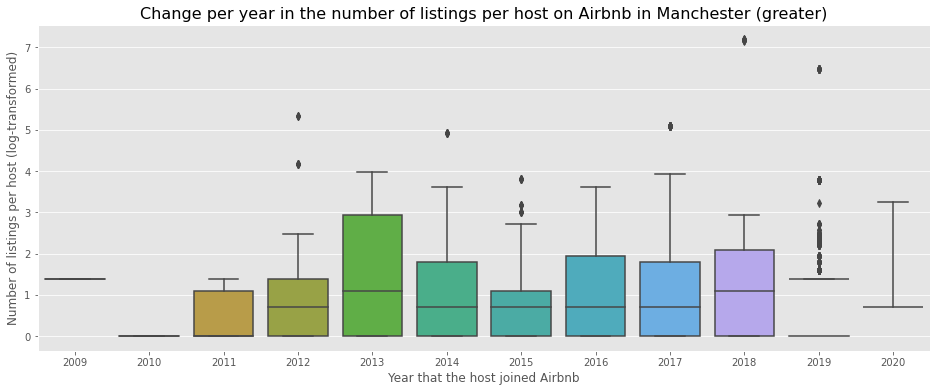

In [220]:
plt.figure(figsize=(16,6))
sns.boxplot(df.host_since.dt.year, np.log(df.host_listings_count))
plt.xlabel('Year that the host joined Airbnb', fontsize=12)
plt.ylabel('Number of listings per host (log-transformed)', fontsize=12)
plt.title('Change per year in the number of listings per host on Airbnb in Manchester (greater)', fontsize=16)
plt.show()

In [221]:
print("Average number of listings per host per year on Airbnb in Manchester:")
print(round(df.set_index('host_since').host_listings_count.resample('YS').mean(),2))

Average number of listings per host per year on Airbnb in Manchester:
host_since
2009-01-01     4.00
2010-01-01     1.00
2011-01-01     1.62
2012-01-01     8.64
2013-01-01    13.72
2014-01-01     6.77
2015-01-01     3.46
2016-01-01     5.20
2017-01-01    10.67
2018-01-01    19.22
2019-01-01    15.23
2020-01-01     3.84
Freq: AS-JAN, Name: host_listings_count, dtype: float64


In [222]:
# List of the largest host_listings_count and the year the host joined Airbnb
df.sort_values('host_listings_count').drop_duplicates('host_listings_count',keep='last').tail(10)[['host_since', 'host_listings_count']]

,host_since,host_listings_count
4852,2017-05-07,51
3221,2013-02-03,53
3229,2012-03-01,65
2133,2014-06-23,138
3772,2017-10-01,162
219,2012-05-15,206
5065,2019-11-20,650
2599,2018-10-23,1279
4746,2018-09-27,1308
2709,2018-10-23,1328


### Kysymys: Kuinka paljon hinnat ovat muuttuneet ajan myötä?

==> Answer: the average price per night for Airbnb listings in Manchster has increased slightly over the last 10 years. In particular, the top end of property prices has increased, resulting in a larger increase in the mean price compared to the median - e.g. the mean price in 2015 was £95.90, whereas the mean price in 2018 (the last complete year of data) was £111.14.


plt.figure(figsize=(16,6))
sns.boxplot(df.first_review.dt.year, np.log(df.price)
plt.xlabel('Year that the listing had its first review', fontsize=12)
plt.ylabel('Nightly price (log-transformed)', fontsize=12)
plt.title('Change per year in the nightly price of Airbnb listings in Manchester', fontsize=16)
plt.show()

In [223]:
#print("Mean nightly price of listings in each year on Airbnb in Manchester:")
#print(round(df.set_index('first_review').price.resample('YS').mean(),2))

In [224]:
# Dropping host_since and first_review as they are no longer needed
df.drop(['host_since', 'first_review'], axis=1, inplace=True)

In [225]:
df.describe()

,id,host_is_superhost,host_listings_count,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_90,number_of_reviews,instant_bookable,host_days_active,check_in_24h,air_conditioning,balcony,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,child_friendly,parking,outdoor_space,host_greeting,internet,long_term_stays,pets_allowed,private_entrance,self_check_in,time_since_last_review
count,5.128000e+03,5128.000000,5128.000000,5128.000000,5128.000000,5128.000000,5128.000000,5128.000000,5128.000000,5128.000000,5128.000000,5128.000000,5128.000000,5.128000e+03,5128.000000,5128.000000,5128.000000,5128.000000,280.0,181.0,5128.000000,5128.000000,5128.000000,5128.000000,5128.000000,5128.000000,5128.000000,5128.000000,5128.000000,5128.000000,5128.000000,5128.000000,5128.000000,5128.000000,5128.000000,5128.000000,5128.000000,4150.000000
mean,2.848308e+07,0.248830,10.314548,0.278276,3.450078,1.329076,1.509945,1.987324,86.849844,18.278471,1.646256,8.524961,3.298362,2.022536e+04,50.934477,28.513456,0.539002,841.598284,1.0,1.0,0.141771,0.415757,0.192863,0.734399,0.173557,0.439158,0.819813,0.213144,0.224844,0.775546,0.225039,0.184672,0.921997,0.335218,0.125585,0.296802,0.225429,196.372289
std,1.128285e+07,0.432377,66.409032,0.448194,2.674939,0.622686,1.062462,1.869978,234.669353,25.736275,1.413545,13.483787,15.685143,1.396442e+06,35.889711,52.042538,0.498525,776.645147,0.0,0.0,0.348849,0.492900,0.394585,0.441696,0.378765,0.496333,0.384381,0.409568,0.417520,0.417263,0.417649,0.388069,0.268203,0.472113,0.331413,0.456893,0.417905,276.764955
min,6.895100e+04,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,-342.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000
25%,2.008983e+07,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,30.000000,0.000000,1.000000,0.000000,1.000000,6.000000e+01,2.000000,1.000000,0.000000,182.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000
50%,3.059073e+07,0.000000,2.000000,0.000000,2.000000,1.000000,1.000000,1.000000,53.000000,10.000000,1.000000,5.000000,1.000000,1.125000e+03,66.000000,8.000000,1.000000,807.500000,1.0,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,78.000000
75%,3.859585e+07,0.000000,5.000000,1.000000,4.000000,1.500000,2.000000,2.000000,90.000000,30.000000,2.000000,15.000000,2.000000,1.125000e+03,84.000000,31.000000,1.000000,1383.000000,1.0,1.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,210.000000
max,4.292844e+07,1.000000,1328.000000,1.000000,30.000000,12.000000,11.000000,20.000000,12345.000000,500.000000,16.000000,234.000000,400.000000,1.000000e+08,90.000000,539.000000,1.000000,3729.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2174.000000


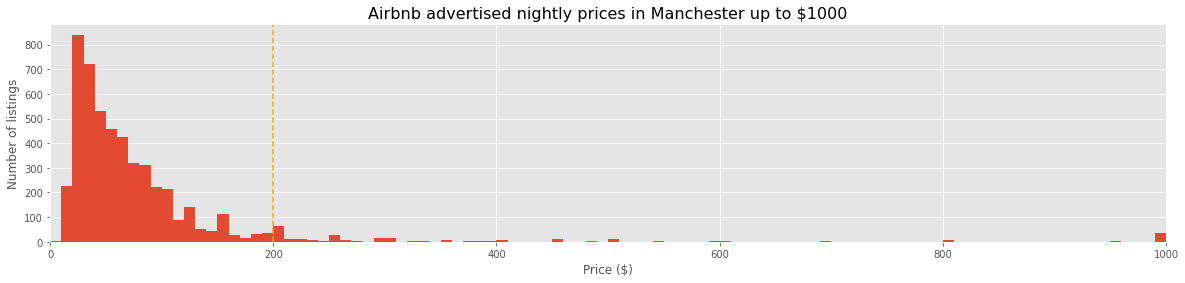

In [226]:

# Distribution of prices from £0 to £1000
plt.figure(figsize=(20,4))
df.price.hist(bins=100, range=(0,1000))
plt.margins(x=0)
plt.axvline(200, color='orange', linestyle='--')
plt.title("Airbnb advertised nightly prices in Manchester up to $1000", fontsize=16)
plt.xlabel("Price ($)")
plt.ylabel("Number of listings")
plt.show()

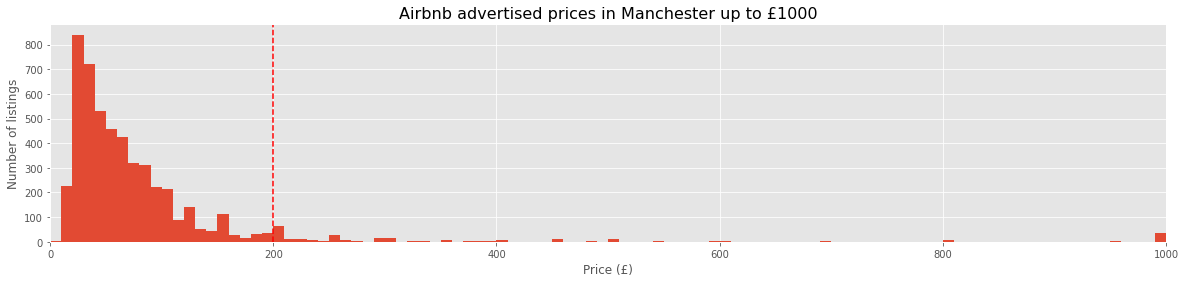

In [227]:

# Distribution of prices from £0 to £1000
plt.figure(figsize=(20,4))
df.price.hist(bins=100, range=(0,1000))
plt.margins(x=0)
plt.axvline(200, color='red', linestyle='--')
plt.title("Airbnb advertised prices in Manchester up to $1000", fontsize=16)
plt.xlabel("Price ($)")
plt.ylabel("Number of listings")
plt.show()

# Price taisi olla korjattu jo jossai muualla, alla oleva solu taitaa siis olla turha -- HUOM

In [95]:
#df.price = df.price.str[1:-3]
#df.price = df.price.str.replace(",", "")
df.price = df.price.astype('int64')



In [228]:
df.price

0        65
1        60
2        34
3        55
4        60
       ... 
5123    500
5124     30
5125     40
5126    693
5127    500
Name: price, Length: 5128, dtype: int64

In [229]:
df.cleaning_fee
df.cleaning_fee = df.cleaning_fee.str[1:-3]
df.cleaning_fee = df.cleaning_fee.str.replace(",", "")


AttributeError: Can only use .str accessor with string values!

In [230]:
df.cleaning_fee.fillna(0, inplace=True)
df.cleaning_fee = df.cleaning_fee.astype('int64')

In [231]:
df.extra_people = df.extra_people.str[1:-3]
df.extra_people = df.extra_people.str.replace(",", "")


AttributeError: Can only use .str accessor with string values!

In [232]:
df.extra_people.fillna(0, inplace=True)
df.extra_people = df.extra_people.astype('int64')

# Edellä olevasta HUOM-kohdasta lähtien tähän asti, ylä puolella on toistoa. Nämä osuudet hoidettiin jo aikaisemmin

In [233]:
df.drop(['availability_30', 'availability_60', 'availability_365'], axis=1, inplace=True)

KeyError: "['availability_30' 'availability_60' 'availability_365'] not found in axis"

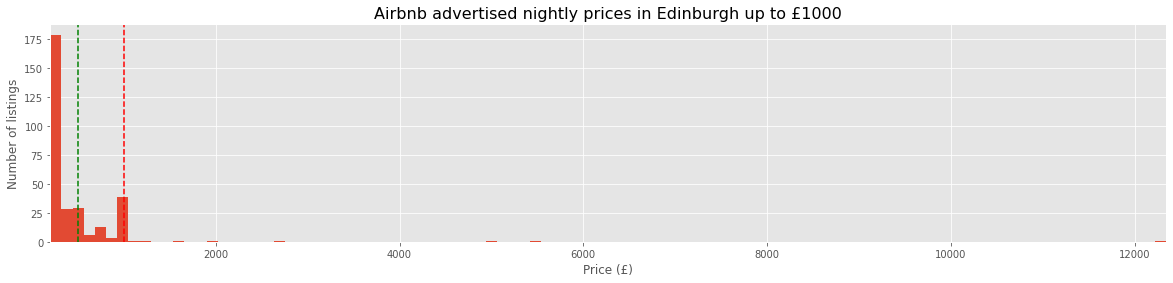

In [234]:
# Distribution of prices from £200 upwards
plt.figure(figsize=(20,4))
df.price.hist(bins=100, range=(200, max((df.price).astype('float64'))))
plt.margins(x=0)
plt.axvline(500, color='green', linestyle='--')
plt.axvline(1000, color='red', linestyle='--')
plt.title("Airbnb advertised nightly prices in Edinburgh up to £1000", fontsize=16)
plt.xlabel("Price (£)")
plt.ylabel("Number of listings")
plt.show()

In [235]:

# Replacing values under £10 with £10
df.loc[df.price <= 10, 'price'] = 10

# Replacing values over £1000 with £1000
df.loc[df.price >= 1000, 'price'] = 1000

In [236]:

# Renaming the neighbourhood column
df.rename(columns={'neighbourhood_cleansed': 'borough'}, inplace=True)

# Importing the London borough boundary GeoJSON file as a dataframe in geopandas
map_df = gpd.read_file('data/man/neighbourhoods.geojson')
map_df.head()

,neighbourhood,neighbourhood_group,geometry
0,Stockport District,Stockport,"MULTIPOLYGON (((-2.24687 53.39608, -2.24686 53..."
1,Tameside District,Tameside,"MULTIPOLYGON (((-2.16965 53.48678, -2.16932 53..."
2,Salford District,Salford,"MULTIPOLYGON (((-2.48973 53.46013, -2.48934 53..."
3,Trafford District,Trafford,"MULTIPOLYGON (((-2.47833 53.39623, -2.47815 53..."
4,Wigan District,Wigan,"MULTIPOLYGON (((-2.73052 53.52058, -2.73048 53..."


In [237]:
# Dropping the empty column
map_df.drop('neighbourhood_group', axis=1, inplace=True)

# Creating a dataframe of listing counts and median price by borough
borough_df = pd.DataFrame(df.groupby('borough').size())
borough_df.rename(columns={0: 'number_of_listings'}, inplace=True)
borough_df['median_price'] = df.groupby('borough').price.median().values

# Joining the dataframes
borough_map_df = map_df.set_index('neighbourhood').join(borough_df)

borough_map_df.head()

,geometry,number_of_listings,median_price
neighbourhood,,,
Stockport District,"MULTIPOLYGON (((-2.24687 53.39608, -2.24686 53...",266,43.0
Tameside District,"MULTIPOLYGON (((-2.16965 53.48678, -2.16932 53...",116,42.5
Salford District,"MULTIPOLYGON (((-2.48973 53.46013, -2.48934 53...",849,60.0
Trafford District,"MULTIPOLYGON (((-2.47833 53.39623, -2.47815 53...",437,50.0
Wigan District,"MULTIPOLYGON (((-2.73052 53.52058, -2.73048 53...",84,40.0


In [238]:
df['borough']

0           Bolton District
1               City Centre
2          Salford District
3         Rochdale District
4         Rochdale District
               ...         
5123    Ancoats and Clayton
5124          Bury District
5125            Fallowfield
5126      Trafford District
5127    Ancoats and Clayton
Name: borough, Length: 5128, dtype: object

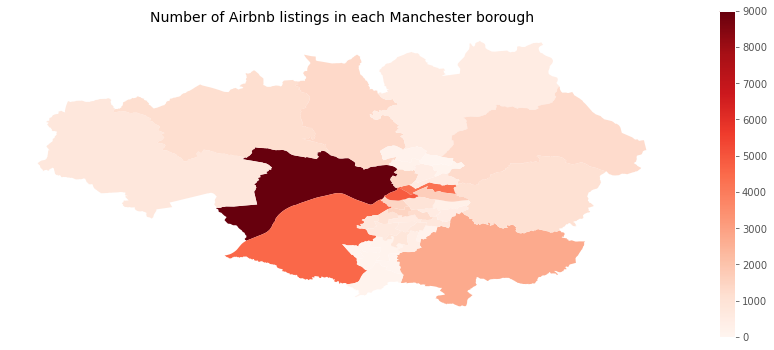

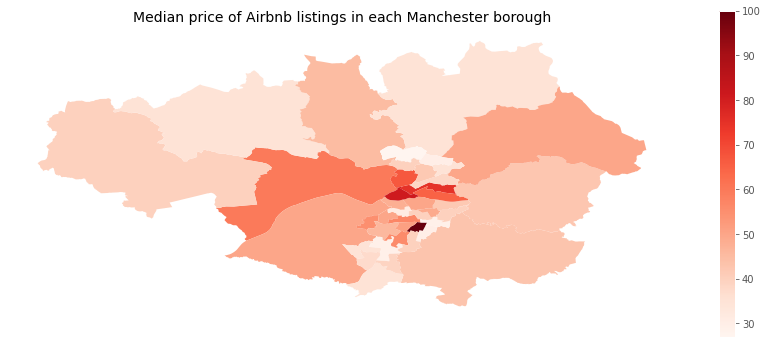

In [240]:
# Plotting the number of listings in each borough
fig1, ax1 = plt.subplots(1, figsize=(15, 6))
borough_map_df.plot(column='number_of_listings', cmap='Reds', ax=ax1)
ax1.axis('off')
ax1.set_title('Number of Airbnb listings in each Manchester borough', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0, vmax=9000))
sm._A = [] # Creates an empty array for the data range
cbar = fig1.colorbar(sm)
plt.show()

# Plotting the median price of listings in each borough
fig2, ax2 = plt.subplots(1, figsize=(15, 6))
borough_map_df.plot(column='median_price', cmap='Reds', ax=ax2)
ax2.axis('off')
ax2.set_title('Median price of Airbnb listings in each Manchester borough', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=min(borough_map_df.median_price), vmax=max(borough_map_df.median_price)))
sm._A = [] # Creates an empty array for the data range
cbar = fig2.colorbar(sm)
plt.show()


property_type and room_type

About 80% of properties are apartments/flats. The remainder are houses or more uncommon property types (e.g. bed and breakfast).

About 62% of listings are entire homes (i.e. you are renting the entire property on your own). Most of the remainder are private rooms (i.e. you are renting a bedroom and possibly also a bathroom, but there will be other people in the property). Fewer than 1% are shared rooms (i.e. you are sharing a room with either the property owner or other guests).

In [241]:

def category_count_plot(col, figsize=(8,4)):
    """
    Plots a simple bar chart of the total count for each category in the column specified.
    A figure size can optionally be specified.
    """
    plt.figure(figsize=figsize)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()

In [242]:
df.property_type.replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House'  
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

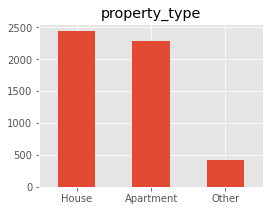

House        0.474649
Apartment    0.444618
Other        0.080733
Name: property_type, dtype: float64


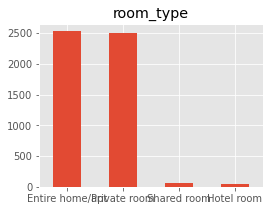

Entire home/apt    0.492785
Private room       0.487324
Shared room        0.011700
Hotel room         0.008190
Name: room_type, dtype: float64


In [243]:
for col in ['property_type', 'room_type']:
    category_count_plot(col, figsize=(4,3))
    print(df[col].value_counts(normalize=True))

## Here, I made the decision to classify hotel rooms as private rooms. 

You could just as well classify them as Entire home/apt. You could just as well classify them as Entire home/apts. I figured that as hotel rooms rarely have cooking facilities etc., they might be more like private rooms than entire homes.

In [244]:
df.room_type.replace({
    'Hotel room': 'Private room',
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

In [245]:
#bin_column('review_scores_rating',
#           bins=[0, 80, 95, 100],
#           labels=['0-79/100', '80-94/100', '95-100/100'],
#           na_label='no reviews')

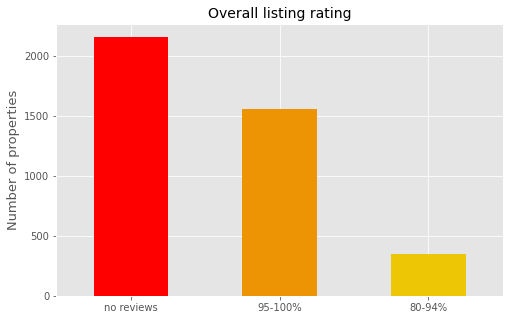

In [246]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.set_title('Overall listing rating', fontsize=14)
df['review_scores_rating'].value_counts().sort_index(ascending=False).plot(kind='bar', color=['red', '#ed9405', '#edc605', '#ffec19' ], ax=ax)
ax.set_xticklabels(labels=['no reviews', '95-100%', '80-94%', '0-79%'], rotation=0)
ax.set_xlabel('')
ax.set_ylabel('Number of properties', fontsize=13)
plt.show()

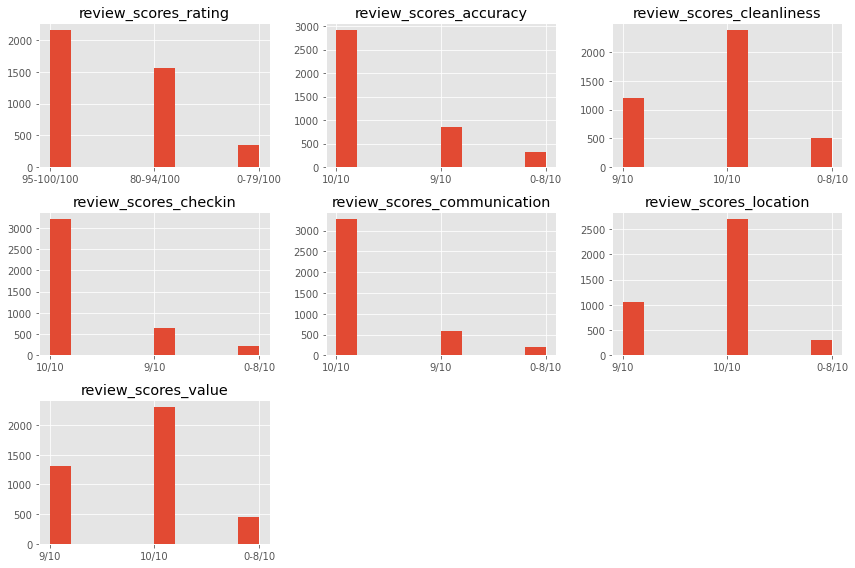

In [247]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [248]:
variables_to_plot.pop(0)

'review_scores_rating'

# Binnattu jo jossain muualla, alla taitaa olla ihan turhia juttuja

In [126]:
# Binning for all columns scored out of 10
for col in variables_to_plot:
    bin_column(col,
               bins=[0, 8, 9, 10],
               labels=['0-8/10', '9/10', '10/10'],
               na_label='no reviews')


TypeError: '<' not supported between instances of 'int' and 'str'

In [127]:
# Binning column scored out of 100
bin_column('review_scores_rating',
           bins=[0, 80, 95, 100],
           labels=['0-79/100', '80-94/100', '95-100/100'],
           na_label='no reviews')

TypeError: '<' not supported between instances of 'int' and 'str'

# Ilmeisesti NaN-arvojen muuntaminen 0-79 tms. luokkaan ei taida kannattaa. -- Tähän asti yläpuolella kai turhaa HUOM

In [130]:
#df.review_scores_rating.replace({
#    'nan': '0-79/100'
#    }, inplace=True)
#
#df.columns.str.startswith("review_scores").replace()

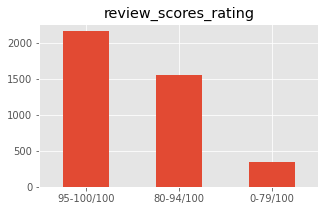

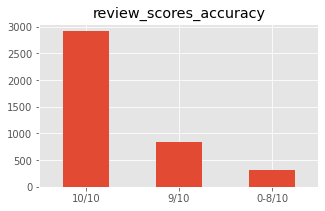

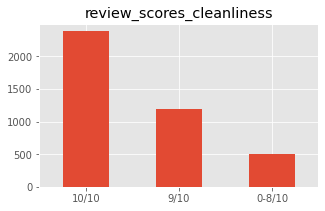

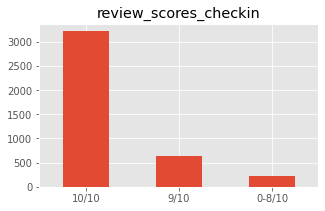

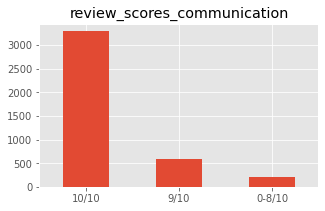

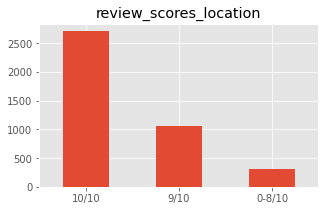

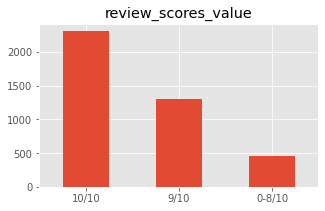

In [249]:
for col in list(df.columns[df.columns.str.startswith("review_scores") == True]):
    category_count_plot(col, figsize=(5,3))

In [250]:
variables_to_plot.pop(0)

'review_scores_accuracy'

# Lisää NaN-arvojen käsittelyä, josta kai kannattaa luopua

for col in variables_to_plot:
    col.replace({
        'nan': '0-8/10'
    }, inplace=True)

df.review_scores_value({
    'nan': '0-8/10'
})



In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5128 entries, 0 to 5127
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           5128 non-null   int64  
 1   host_response_time           5128 non-null   object 
 2   host_response_rate           5128 non-null   object 
 3   host_is_superhost            5128 non-null   int64  
 4   host_listings_count          5128 non-null   int64  
 5   host_identity_verified       5128 non-null   int64  
 6   borough                      5128 non-null   object 
 7   property_type                5128 non-null   object 
 8   room_type                    5128 non-null   object 
 9   accommodates                 5128 non-null   int64  
 10  bathrooms                    5128 non-null   float64
 11  bedrooms                     5128 non-null   float64
 12  beds                         5128 non-null   float64
 13  price             

In [251]:
for col in ['bathrooms', 'bedrooms', 'beds']:
    df[col].fillna(df[col].median(), inplace=True)

In [253]:
# A column that seems to no longer exist - either that or dropped earlier
#df.bed_type.value_counts()

In [255]:
# Erilaisten sänkytyyppien säilyttämisessä ei näyttäisi olevan mieltä
#df.drop('bed_type', axis=1, inplace=True)

# Alla turhaa amenities säätämistä, voi poistaa - korjattu jossain aikaisemmin

In [256]:
# Example of amenities listed
#df.amenities[:1].values

AttributeError: 'DataFrame' object has no attribute 'amenities'

In [257]:
# Creating a set of all possible amenities
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

AttributeError: 'DataFrame' object has no attribute 'amenities'

In [168]:
df.loc[df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
df.loc[df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
df.loc[df['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

In [169]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = df.iloc[:,41:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in df.iloc[:,41:].columns:
    if df[col].sum() < len(df)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
df.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
df.drop('amenities', axis=1, inplace=True)

['air_conditioning', 'high_end_electronics', 'bbq', 'nature_and_views', 'gym', 'hot_tub_sauna_or_pool', 'secure', 'smoking_allowed', 'accessible', 'event_suitable']


In [170]:
df.columns[40:]

Index(['balcony', 'bed_linen', 'breakfast', 'tv', 'coffee_machine',
       'cooking_basics', 'white_goods', 'elevator', 'child_friendly',
       'parking', 'outdoor_space', 'host_greeting', 'internet',
       'long_term_stays', 'pets_allowed', 'private_entrance', 'self_check_in'],
      dtype='object')

# Amenitiesit oli käsitelty aikaisemmin

In [260]:
#df.price

0        65
1        60
2        34
3        55
4        60
       ... 
5123    500
5124     30
5125     40
5126    693
5127    500
Name: price, Length: 5128, dtype: int64

### price back to int

In [262]:
#df.price = df.price.str[1:-3]
#df.price = df.price.str.replace(",", "")
#df.price = df.price.astype('int64')

In [263]:
#df.price

In [115]:
df.head()


,id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,borough,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_90,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,host_days_active,check_in_24h,air_conditioning,balcony,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,child_friendly,parking,outdoor_space,host_greeting,internet,long_term_stays,pets_allowed,private_entrance,self_check_in,time_since_first_review,time_since_last_review
0,68951,within a few hours,100%,1,1,1,Bolton District,House,Entire home/apt,4,1.0,2.0,6.0,65,150,25,4,10,2,180,0,82,95-100/100,10/10,9/10,10/10,10/10,9/10,9/10,0,strict_14_with_grace_period,3011.0,NaN,NaN,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,4+ years,200.0
1,85109,within an hour,100%,1,4,1,City Centre,Apartment,Private room,2,1.5,1.0,1.0,60,0,0,2,0,2,14,88,434,95-100/100,10/10,10/10,10/10,10/10,10/10,9/10,0,strict_14_with_grace_period,2935.0,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4+ years,35.0
2,157612,within a few hours,50-89%,1,3,0,Salford District,Apartment,Entire home/apt,3,1.0,2.0,2.0,34,150,20,1,14,2,365,47,96,95-100/100,10/10,10/10,10/10,10/10,9/10,10/10,0,moderate,2841.0,1.0,NaN,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4+ years,134.0
3,159189,unknown,unknown,0,1,0,Rochdale District,House,Shared room,2,1.0,1.0,2.0,55,100,0,1,30,1,3,90,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,2840.0,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN
4,283495,within a few hours,100%,0,1,0,Rochdale District,House,Private room,2,1.0,1.0,1.0,60,0,0,1,0,3,1125,0,10,95-100/100,10/10,10/10,10/10,10/10,10/10,10/10,0,flexible,2681.0,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,4+ years,624.0


In [177]:
df.dtypes

experiences_offered                  object
host_response_time                   object
host_response_rate                   object
host_is_superhost                    object
host_listings_count                   int64
host_has_profile_pic                 object
host_identity_verified               object
borough                              object
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
price                                 int64
security_deposit                     object
cleaning_fee                          int64
guests_included                       int64
extra_people                          int64
minimum_nights                        int64
maximum_nights                        int64
has_availability                     object
availability_90                 

In [117]:
# Nämä on taidettu jo poistaa muualla
#df.drop(['has_availability', 'host_has_profile_pic', 'is_business_travel_ready', 
#         'require_guest_phone_verification', 'require_guest_profile_picture', 'requires_license'], axis=1, inplace=True)

In [119]:
# Tämä kai myös poistettu
#df.drop('experiences_offered', axis=1, inplace=True)

In [264]:

df.host_response_time.value_counts(normalize=True)

within an hour        0.612324
unknown               0.209243
within a few hours    0.104134
within a day          0.058502
a few days or more    0.015796
Name: host_response_time, dtype: float64

# Seuraava myöskin hoidettu josssain muualla - HUOM

In [ ]:



df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')
# Bin into four categories
df.host_response_rate = pd.cut(df.host_response_rate, 
                               bins=[0, 50, 90, 99, 100], 
                               labels=['0-49%', '50-89%', '90-99%', '100%'], 
                               include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

In [122]:
df.host_response_rate.value_counts()

100%       3035
unknown    1073
50-89%      555
90-99%      358
0-49%       107
Name: host_response_rate, dtype: int64

In [123]:
# Number of rows without a value for multiple host-related columns
len(df[df.loc[ :,['host_since ', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified'] ].isnull().sum(axis=1) == 5])

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [124]:
df.dropna(subset=['host_since'], inplace=True)

KeyError: ['host_since']

In [125]:
df.property_type.value_counts()

House        2434
Apartment    2280
Other         414
Name: property_type, dtype: int64

# ------------ em. turha osuus loppuu tähän

In [164]:
df.head()

,experiences_offered,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,borough,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_90,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,time_since_first_review,time_since_last_review
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68951,none,within a few hours,100%,t,1,t,t,Bolton District,House,Entire home/apt,4,1.0,2.0,6.0,"{TV,Wifi,Kitchen,""Free street parking"",""Indoor...",65,$150.00,25,4,10,2,180,t,0,82,97.0,10.0,9.0,10.0,10.0,9.0,9.0,f,f,f,strict_14_with_grace_period,f,t,4+ years,200.0
85109,none,within an hour,100%,t,4,t,t,City Centre,Apartment,Private room,2,1.5,1.0,1.0,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",60,$0.00,0,2,0,2,14,t,88,434,97.0,10.0,10.0,10.0,10.0,10.0,9.0,f,f,f,strict_14_with_grace_period,f,f,4+ years,35.0
157612,none,within a few hours,90%,t,3,t,f,Salford District,Apartment,Entire home/apt,3,1.0,2.0,2.0,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",34,$150.00,20,1,14,2,365,t,47,96,98.0,10.0,10.0,10.0,10.0,9.0,10.0,f,f,f,moderate,t,t,4+ years,134.0
159189,none,NaN,NaN,f,1,t,f,Rochdale District,House,Shared room,2,1.0,1.0,2.0,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",55,$100.00,0,1,30,1,3,t,90,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,f,flexible,f,f,NaN,NaN
283495,none,within a few hours,100%,f,1,t,f,Rochdale District,House,Private room,2,1.0,1.0,1.0,"{TV,""Cable TV"",Wifi,Kitchen,""Free parking on p...",60,NaN,0,1,0,3,1125,t,0,10,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,flexible,f,f,4+ years,624.0


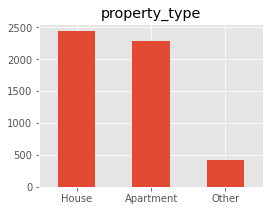

House        0.474649
Apartment    0.444618
Other        0.080733
Name: property_type, dtype: float64


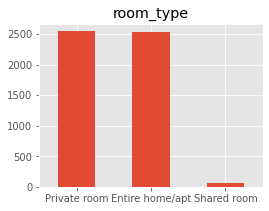

Private room       0.495515
Entire home/apt    0.492785
Shared room        0.011700
Name: room_type, dtype: float64


In [265]:
for col in ['property_type', 'room_type']:
    category_count_plot(col, figsize=(4,3))
    print(df[col].value_counts(normalize=True))

In [266]:
print("Median number of listings per host:", int(df.host_listings_count.median()))
print("Mean number of listings per host:", int(round(df.host_listings_count.mean())))
print("Highest number of listins per host:", int(round(df.host_listings_count.max())))
print(f"{int(round(100*len(df[df.host_listings_count == 1])/len(df)))}% of listings are from hosts with one listing.")

Median number of listings per host: 2
Mean number of listings per host: 10
Highest number of listins per host: 1328
33% of listings are from hosts with one listing.


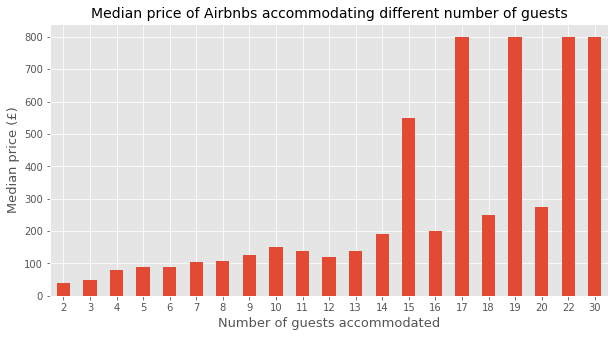

In [267]:
plt.figure(figsize=(10,5))
df.groupby('accommodates').price.median().plot(kind='bar')
plt.title('Median price of Airbnbs accommodating different number of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=13)
plt.ylabel('Median price (£)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

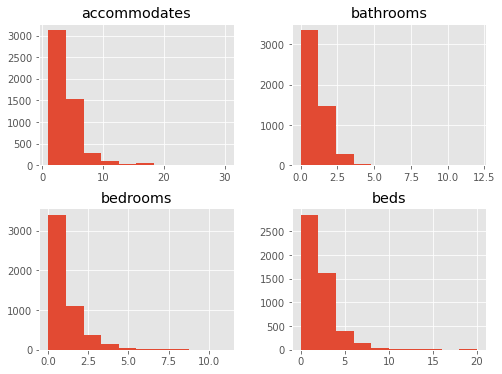

In [268]:

df[['accommodates', 'bathrooms', 'bedrooms', 'beds']].hist(figsize=(8,6));

In [269]:
def binary_count_and_price_plot(col, figsize=(8,3)):
    """
    Plots a simple bar chart of the counts of true and false categories in the column specified,
    next to a bar chart of the median price for each category.
    A figure size can optionally be specified.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
    df.groupby(col).size().plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    df.groupby(col).price.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Median price (£)')
    ax2.set_xlabel('')
    
    plt.show()

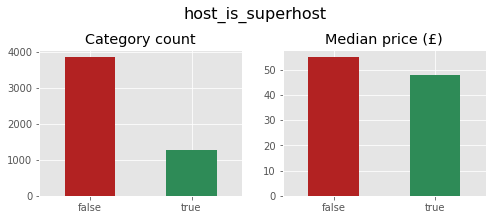

0    0.75117
1    0.24883
Name: host_is_superhost, dtype: float64


In [270]:
binary_count_and_price_plot('host_is_superhost')
print(df.host_is_superhost.value_counts(normalize=True))

In [271]:
df.host_identity_verified.value_counts(normalize=True)

0    0.721724
1    0.278276
Name: host_identity_verified, dtype: float64

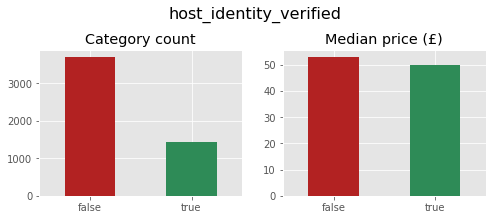

In [272]:
binary_count_and_price_plot('host_identity_verified')

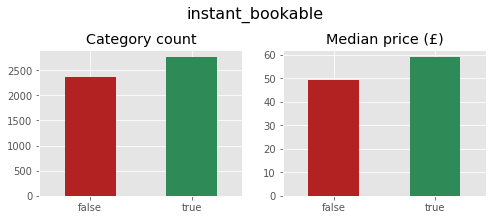

1    0.539002
0    0.460998
Name: instant_bookable, dtype: float64


In [273]:
binary_count_and_price_plot('instant_bookable')
print(df.instant_bookable.value_counts(normalize=True))

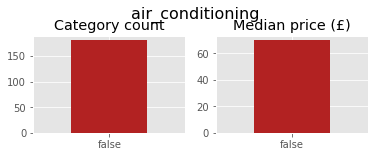

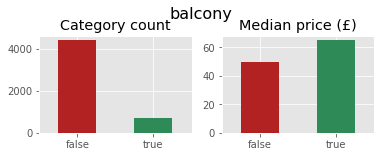

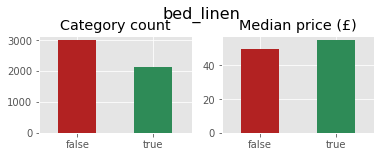

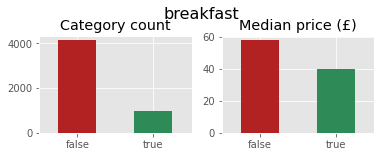

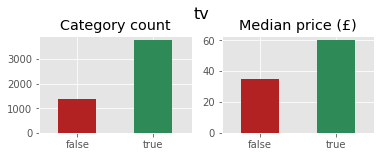

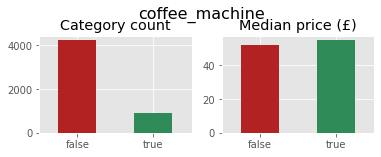

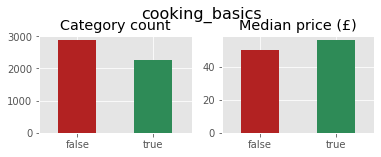

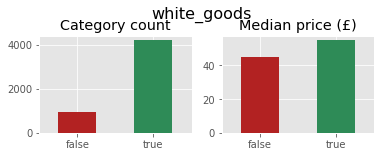

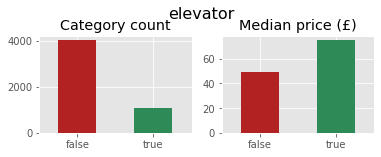

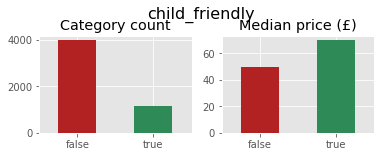

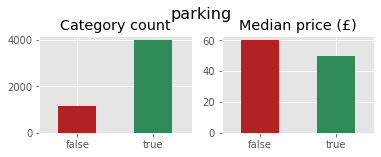

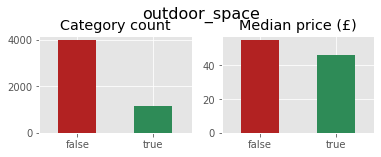

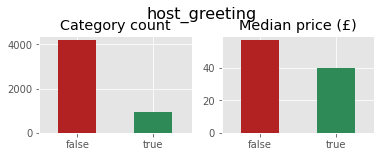

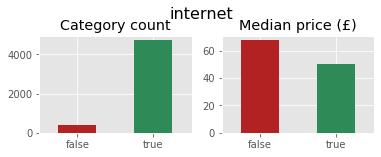

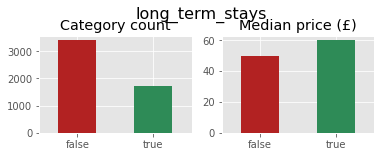

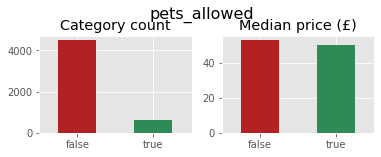

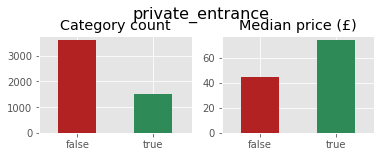

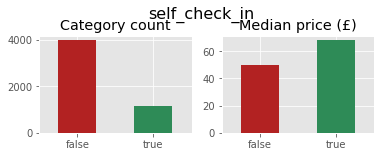

In [274]:
for col in df.iloc[:,33:-2].columns:
    binary_count_and_price_plot(col, figsize=(6,2))

In [275]:
df.head()

,id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,borough,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_90,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,host_days_active,check_in_24h,air_conditioning,balcony,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,child_friendly,parking,outdoor_space,host_greeting,internet,long_term_stays,pets_allowed,private_entrance,self_check_in,time_since_first_review,time_since_last_review
0,68951,within a few hours,100%,1,1,1,Bolton District,House,Entire home/apt,4,1.0,2.0,6.0,65,$150.00,25,4,10,2,180,0,82,95-100/100,10/10,9/10,10/10,10/10,9/10,9/10,0,strict_14_with_grace_period,3011.0,NaN,NaN,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,4+ years,200.0
1,85109,within an hour,100%,1,4,1,City Centre,Apartment,Private room,2,1.5,1.0,1.0,60,$0.00,0,2,0,2,14,88,434,95-100/100,10/10,10/10,10/10,10/10,10/10,9/10,0,strict_14_with_grace_period,2935.0,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4+ years,35.0
2,157612,within a few hours,50-89%,1,3,0,Salford District,Apartment,Entire home/apt,3,1.0,2.0,2.0,34,$150.00,20,1,14,2,365,47,96,95-100/100,10/10,10/10,10/10,10/10,9/10,10/10,0,moderate,2841.0,1.0,NaN,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4+ years,134.0
3,159189,unknown,unknown,0,1,0,Rochdale District,House,Shared room,2,1.0,1.0,2.0,55,$100.00,0,1,30,1,3,90,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,2840.0,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN
4,283495,within a few hours,100%,0,1,0,Rochdale District,House,Private room,2,1.0,1.0,1.0,60,NaN,0,1,0,3,1125,0,10,95-100/100,10/10,10/10,10/10,10/10,10/10,10/10,0,flexible,2681.0,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,4+ years,624.0


In [276]:

transformed_df = pd.get_dummies(df)

In [277]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

# Removing correlations

 * Correlations can be seen between NaN reviews, which are listings, which haven't had any reviews yet) for the different review categories, as well as the **first** and **last review times**. The NaN categories can, therefore, be dropped.
 * host_response_rate_unknown and host_response_time_unknown have a correlation. One of these will be dropped.
 * host_response_rate_0-49% - host_response_time_a few days or more. We'll drop one of these.
 * There would also appear to be correlations between *property_type_House* and *property_type_Apartment*, as well as between *room_type_Private room* and *room_type_Entire_home_apt*. These were, of course, the 2 main categories of their features, before they were one-hot encoded. Although important categories, one of each will be dropped in order to reduce multi-collinearity. Apartments and private rooms, as these are the second most common categories).

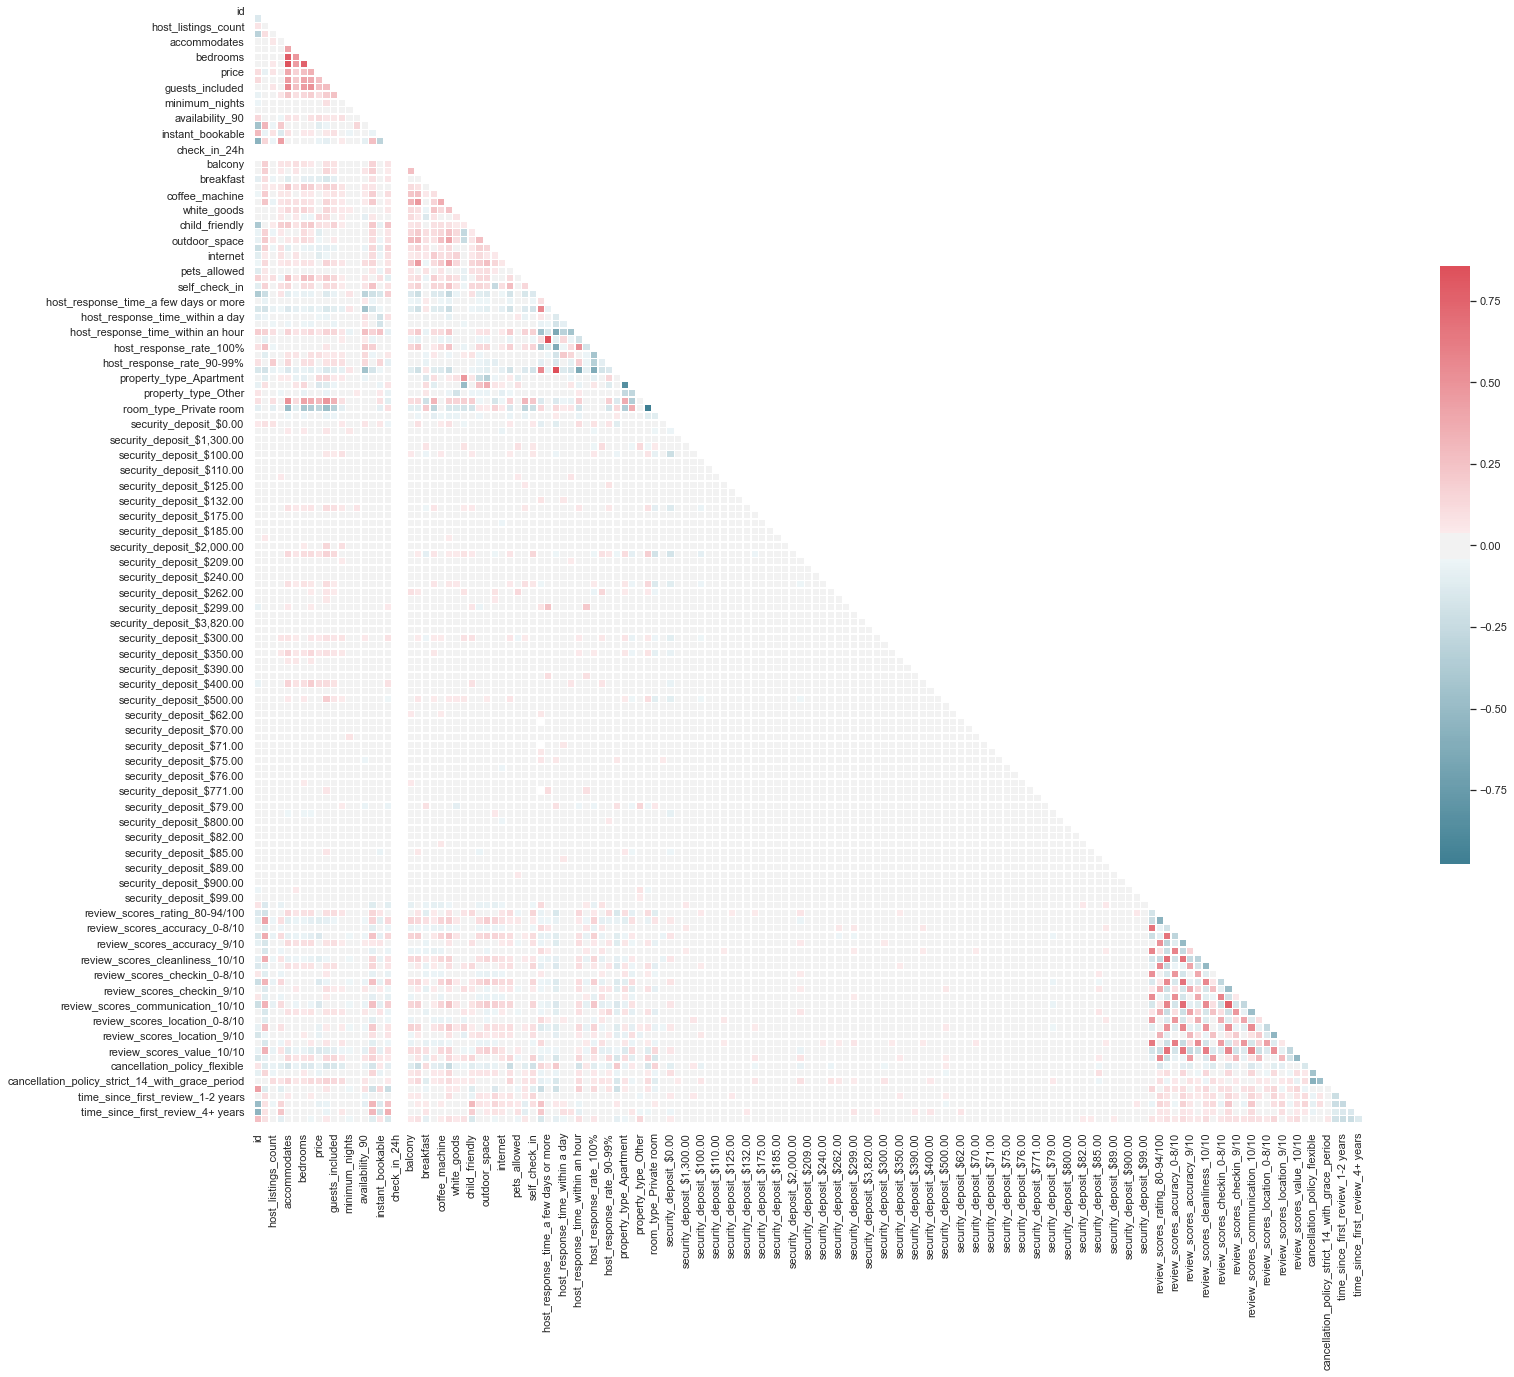

In [278]:
multi_collinearity_heatmap(transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('borough')]), axis=1), figsize=(25,22))

In [279]:
to_drop = ['beds',
           'bedrooms',
           'guests_included', 
           'host_response_rate_unknown',
           'host_response_rate_0-49%',
           'property_type_Apartment',
           'room_type_Private room']
to_drop.extend(list(transformed_df.columns[transformed_df.columns.str.endswith('nan')]))

transformed_df.drop(to_drop, axis=1, inplace=True)

In [280]:
df.security_deposit

0       $150.00
1         $0.00
2       $150.00
3       $100.00
4           NaN
         ...   
5123      $0.00
5124        NaN
5125        NaN
5126        NaN
5127      $0.00
Name: security_deposit, Length: 5128, dtype: object

In [285]:
df.security_deposit = df.security_deposit.str[1:-3]
df.security_deposit = df.security_deposit.str.replace(",", "")
df.security_deposit.fillna(0, inplace=True)
df.security_deposit = df.security_deposit.astype('int64')

In [299]:
df.security_deposit

0       150
1         0
2       150
3       100
4         0
       ... 
5123      0
5124      0
5125      0
5126      0
5127      0
Name: security_deposit, Length: 5128, dtype: int64

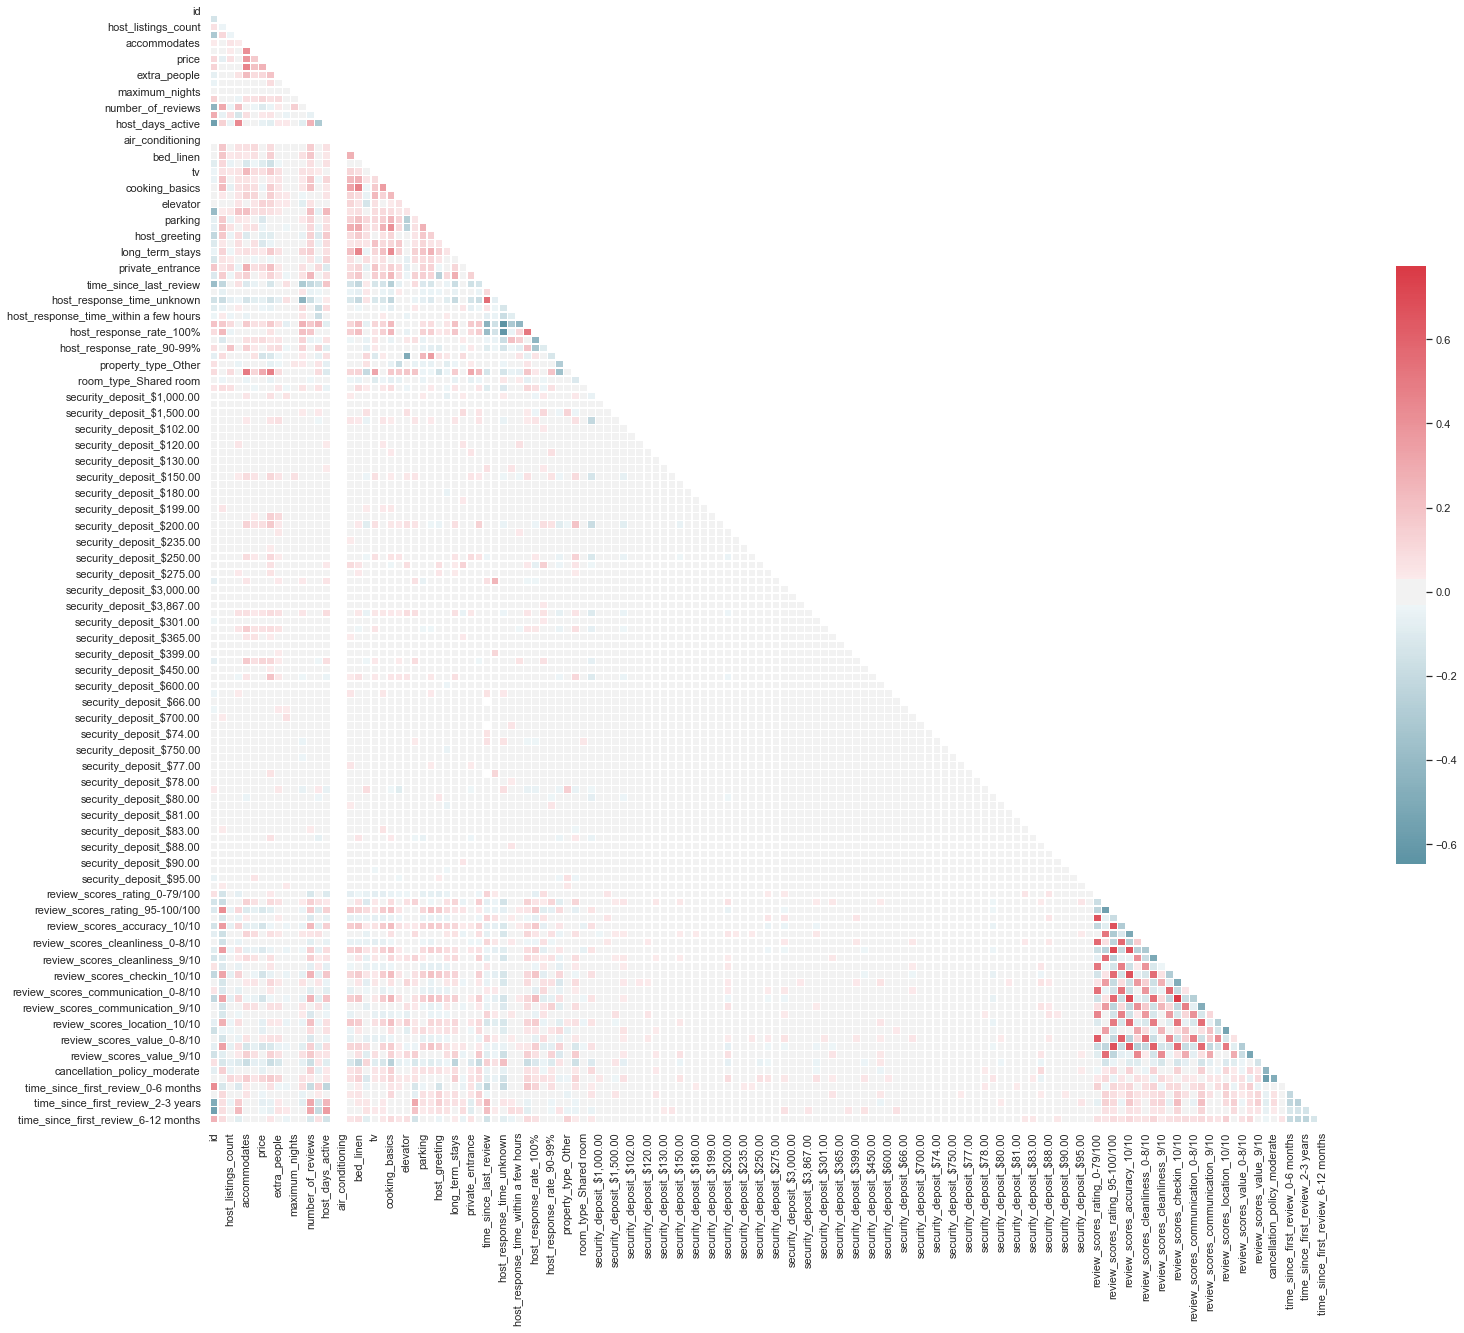

In [287]:
# Final assessment of multi-collinearity
multi_collinearity_heatmap(transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('borough')]), axis=1), figsize=(25,22))

In [296]:
#numerical_columns = ['accommodates', 'availability_90', 'bathrooms', 'cleaning_fee', 'extra_people', 'host_days_active', 'host_listings_count', 'maximum_nights', 'minimum_nights', 'number_of_reviews', 'price', 'security_deposit']
numerical_columns = ['accommodates', 'availability_90', 'bathrooms', 'cleaning_fee', 'extra_people', 'host_listings_count', 'maximum_nights', 'minimum_nights', 'number_of_reviews', 'price', 'security_deposit']
#numerical_columns = ['accommodates', 'availability_90', 'bathrooms', 'cleaning_fee', 'extra_people', 'host_days_active', 'host_listings_count', 'maximum_nights', 'minimum_nights', 'number_of_reviews', 'price', 'security_deposit']


In [297]:
transformed_df[numerical_columns].hist(figsize=(10,11));

KeyError: "['security_deposit'] not in index"

In [295]:
# Log transforming columns
numerical_columns = [i for i in numerical_columns if i not in ['availability_90', 'host_days_active']] # Removing items not to be transformed

for col in numerical_columns:
    transformed_df[col] = transformed_df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    transformed_df[col] = np.log(transformed_df[col])

KeyError: 'security_deposit'

In [294]:

transformed_df[numerical_columns].hist(figsize=(10,11));

KeyError: "['security_deposit'] not in index"

## Saving transformed_df to csv - tallennettu - HUOM

In [302]:
transformed_df_before_train = transformed_df.to_csv(r'data/man/transformed_df_before_train_man.csv')
transformed_df = pd.read_csv('data/man/transformed_df_before_train_man.csv', index_col=0)

**----------------------------------------------------------------------------**

In [303]:
# Separating X and y
X = transformed_df.drop('price', axis=1)
y = transformed_df.price

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [304]:
# Save cleaned dataset
before_build = df.to_csv(r'data/listings_before_build_manchester.csv', index=id, header=True)
df = pd.read_csv('data/listings_before_build_manchester.csv', index_col=0)

# Building Neural Network

In [305]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## XGBOOST model

In [178]:
import time

xgb_start_mil = int(round(time.time() * 1000))
xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

xgb_reg_end = time.time()
xgb_end_mil = int(round(time.time() * 1000))



print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))
print((xgb_end_mil-xgb_start_mil), " ms")

Time taken to run: 0.1 minutes

Training MSE: 0.0199
Validation MSE: 0.1849

Training r2: 0.9668
Validation r2: 0.6776
3966  ms


In [156]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
borough_Crumpsall,0.000373
borough_Sharston,0.000727
borough_Cheetham,0.000734
review_scores_location_10/10,0.000747
borough_Baguley,0.001089
...,...
property_type_Other,0.013353
host_listings_count,0.020241
borough_City Centre,0.023728
accommodates,0.035016


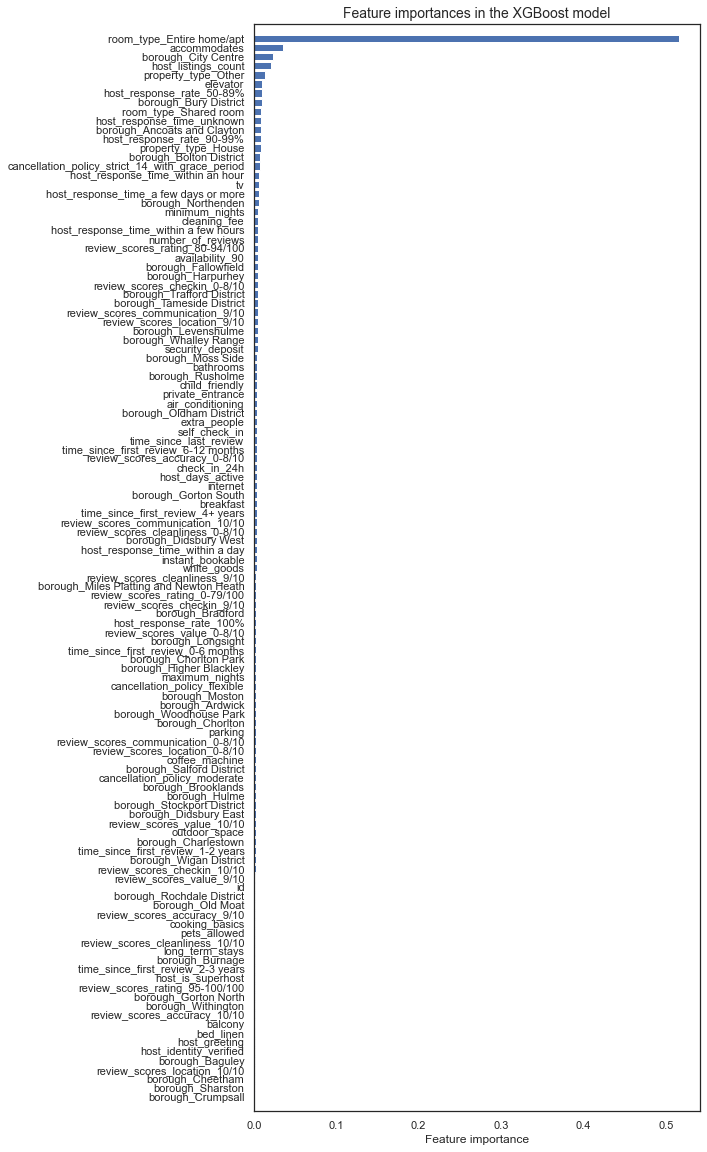

In [157]:
# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

In [158]:
import pickle
file_xgboost = "xgb_reg.pkl"
pickle.dump(xgb_reg, open(file_xgboost, "wb"))

# to load
#xgb_reg = pickle.load(open(file_xgboost, "rb"))

## Unrequired features?

Looking at the above image, which shows us the "weights" or importances of different features, it's not difficult to notice that there seem to be many features, which seemingly have little to no effect on the price of an airbnb listing. It might be a good idea to get rid of some of them.

In [170]:
# Median price for different host listing counts
plt.figure()
df_merged.groupby('host_listings_count').price.median().plot(figsize=(20,4), kind='bar')
plt.title('Median price of listings hosted by hosts who are responsible for other properties')
plt.xlabel('Number of properties managed by hosts')
plt.ylabel('Median price (£)');


NameError: name 'df_merged' is not defined

<Figure size 720x432 with 0 Axes>

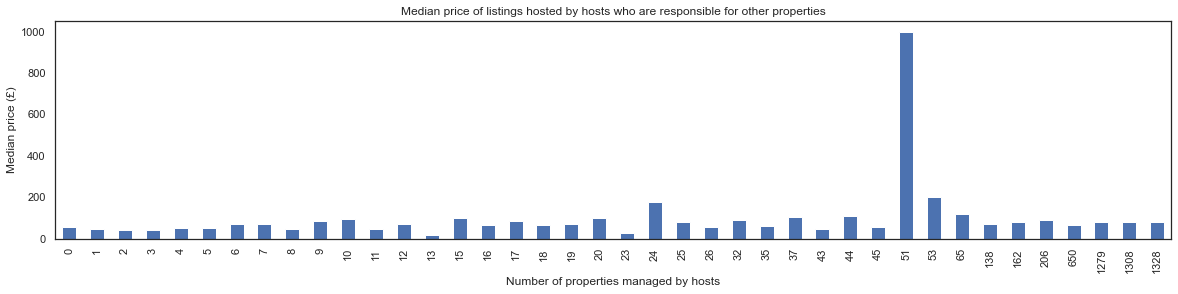

In [172]:
# Median price for different host listing counts
plt.figure()
df.groupby('host_listings_count').price.median().plot(figsize=(20,4), kind='bar')
plt.title('Median price of listings hosted by hosts who are responsible for other properties')
plt.xlabel('Number of properties managed by hosts')
plt.ylabel('Median price (£)');

# Model 7

In [159]:
all_review = list(X_train.columns[X_train.columns.str.startswith("review_scores")])
review_to_keep = list(X_train.columns[X_train.columns.str.startswith("review_scores_rating")])
review_to_drop = [x for x in all_review if x not in review_to_keep]

X_train_short = X_train.drop(review_to_drop, axis=1)
X_test_short = X_test.drop(review_to_drop, axis=1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               12800     
_________________________________________________________________
dense_17 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_18 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_19 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 513       
Total params: 243,713
Trainable params: 243,713
Non-trainable params: 0
_________________________________________________________________
None


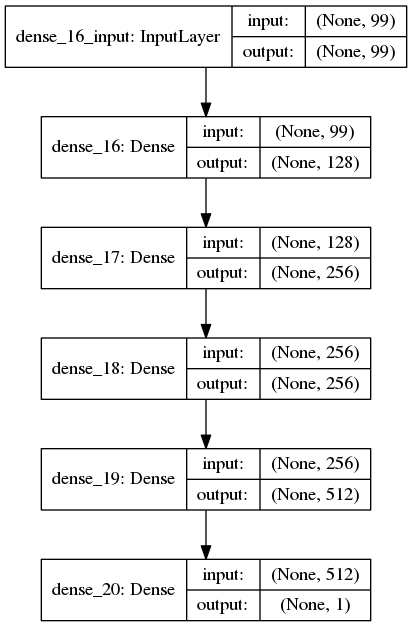

In [164]:
# Building the model
import pydot
nn7 = models.Sequential()
nn7.add(layers.Dense(128, input_shape=(X_train_short.shape[1],), kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn7.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn7.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn7.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn7.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn7.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn7.summary())

# Visualising the neural network
SVG(model_to_dot(nn7, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))
plot_model(nn7, to_file='model7man_plot.png', show_shapes=True, show_layer_names=True)

In [165]:
# Training the model
nn7_start = time.time()

nn7_history = nn7.fit(X_train_short,
                  y_train,
                  epochs=50,
                  batch_size=256,
                  validation_split=0.1)

nn7_end = time.time()

print(f"Time taken to run: {round((nn7_end - nn7_start)/60,1)} minutes")

Train on 3691 samples, validate on 411 samples
Epoch 1/50
3691/3691 [==============================] - 4s 1ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 2/50
3691/3691 [==============================] - 1s 151us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 3/50
3691/3691 [==============================] - 1s 180us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 4/50
3691/3691 [==============================] - 1s 156us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 5/50
3691/3691 [==============================] - 1s 158us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 6/50
3691/3691 [==============================] - 1s 156us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 7/50
3691/3691 [=========

In [223]:
X_test

,id,host_is_superhost,host_listings_count,host_identity_verified,accommodates,bathrooms,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,availability_90,number_of_reviews,instant_bookable,host_days_active,check_in_24h,air_conditioning,balcony,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,child_friendly,parking,outdoor_space,host_greeting,internet,long_term_stays,pets_allowed,private_entrance,self_check_in,time_since_last_review,host_response_time_a few days or more,host_response_time_unknown,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_rate_100%,host_response_rate_50-89%,host_response_rate_90-99%,borough_Ancoats and Clayton,borough_Ardwick,borough_Baguley,borough_Bolton District,borough_Bradford,borough_Brooklands,borough_Burnage,borough_Bury District,borough_Charlestown,borough_Cheetham,...,borough_Hulme,borough_Levenshulme,borough_Longsight,borough_Miles Platting and Newton Heath,borough_Moss Side,borough_Moston,borough_Northenden,borough_Old Moat,borough_Oldham District,borough_Rochdale District,borough_Rusholme,borough_Salford District,borough_Sharston,borough_Stockport District,borough_Tameside District,borough_Trafford District,borough_Whalley Range,borough_Wigan District,borough_Withington,borough_Woodhouse Park,property_type_House,property_type_Other,room_type_Entire home/apt,room_type_Shared room,review_scores_rating_0-79/100,review_scores_rating_80-94/100,review_scores_rating_95-100/100,review_scores_accuracy_0-8/10,review_scores_accuracy_10/10,review_scores_accuracy_9/10,review_scores_cleanliness_0-8/10,review_scores_cleanliness_10/10,review_scores_cleanliness_9/10,review_scores_checkin_0-8/10,review_scores_checkin_10/10,review_scores_checkin_9/10,review_scores_communication_0-8/10,review_scores_communication_10/10,review_scores_communication_9/10,review_scores_location_0-8/10,review_scores_location_10/10,review_scores_location_9/10,review_scores_value_0-8/10,review_scores_value_10/10,review_scores_value_9/10,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,time_since_first_review_0-6 months,time_since_first_review_1-2 years,time_since_first_review_2-3 years,time_since_first_review_4+ years,time_since_first_review_6-12 months
3906,0.922306,-0.575549,-0.218875,-0.620944,1.202523,-0.359322,-0.710018,0.859746,-1.019472,0.279773,0.696767,0.447680,0.439929,0.924815,-0.071595,NaN,NaN,-0.406435,1.185434,2.045736,0.601379,-0.458263,-0.884891,-2.133022,-0.520461,-0.538575,0.537972,-0.538876,-0.475921,0.290865,1.408236,-0.378975,1.539237,-0.539479,-0.489183,-0.126685,-0.514404,-0.249274,-0.340938,0.795689,0.830434,-0.348374,-0.273957,-0.295181,-0.141745,-0.06564,-0.155455,-0.183474,-0.057673,-0.072754,-0.166299,-0.050414,-0.171188,...,-0.172990,-0.128265,-0.113306,-0.112420,-0.174776,-0.064125,-0.067122,-0.114185,-0.162546,-0.107886,-0.16,-0.445433,-0.059351,4.275301,-0.152133,-0.305216,-0.146676,-0.129048,-0.127477,-0.068573,-0.950521,3.374385,1.014536,-0.108807,-0.270652,1.512342,-0.853090,-0.253657,0.873040,-0.444804,-0.327233,-0.930272,1.815160,-0.212221,0.772021,-0.375264,-0.201456,0.749023,-0.358152,-0.251473,0.947181,-0.510157,-0.311662,-0.903252,1.708944,1.383941,-0.602882,-0.800272,-0.428978,-0.498903,-0.515919,-0.279673,2.195600
4074,0.977806,-0.575549,-0.218875,-0.620944,-1.574601,-0.359322,-0.710018,0.382934,-1.019472,0.279773,0.696767,-0.081772,0.241964,0.924815,-0.492678,NaN,NaN,-0.406435,-0.843573,-0.488822,-1.662844,-0.458263,1.130083,0.468818,-0.520461,-0.538575,0.537972,1.855714,-0.475921,-3.438023,-0.710108,-0.378975,-0.649672,-0.539479,-0.547000,-0.126685,-0.514404,-0.249274,-0.340938,0.795689,0.830434,-0.348374,-0.273957,-0.295181,-0.141745,-0.06564,-0.155455,-0.183474,-0.057673,-0.072754,-0.166299,-0.050414,-0.171188,...,-0.172990,-0.128265,-0.113306,-0.112420,-0.174776,-0.064125,-0.067122,-0.114185,-0.162546,-0.107886,-0.16,

In [224]:
X_train

,id,host_is_superhost,host_listings_count,host_identity_verified,accommodates,bathrooms,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,availability_90,number_of_reviews,instant_bookable,host_days_active,check_in_24h,air_conditioning,balcony,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,child_friendly,parking,outdoor_space,host_greeting,internet,long_term_stays,pets_allowed,private_entrance,self_check_in,time_since_last_review,host_response_time_a few days or more,host_response_time_unknown,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_rate_100%,host_response_rate_50-89%,host_response_rate_90-99%,borough_Ancoats and Clayton,borough_Ardwick,borough_Baguley,borough_Bolton District,borough_Bradford,borough_Brooklands,borough_Burnage,borough_Bury District,borough_Charlestown,borough_Cheetham,...,borough_Hulme,borough_Levenshulme,borough_Longsight,borough_Miles Platting and Newton Heath,borough_Moss Side,borough_Moston,borough_Northenden,borough_Old Moat,borough_Oldham District,borough_Rochdale District,borough_Rusholme,borough_Salford District,borough_Sharston,borough_Stockport District,borough_Tameside District,borough_Trafford District,borough_Whalley Range,borough_Wigan District,borough_Withington,borough_Woodhouse Park,property_type_House,property_type_Other,room_type_Entire home/apt,room_type_Shared room,review_scores_rating_0-79/100,review_scores_rating_80-94/100,review_scores_rating_95-100/100,review_scores_accuracy_0-8/10,review_scores_accuracy_10/10,review_scores_accuracy_9/10,review_scores_cleanliness_0-8/10,review_scores_cleanliness_10/10,review_scores_cleanliness_9/10,review_scores_checkin_0-8/10,review_scores_checkin_10/10,review_scores_checkin_9/10,review_scores_communication_0-8/10,review_scores_communication_10/10,review_scores_communication_9/10,review_scores_location_0-8/10,review_scores_location_10/10,review_scores_location_9/10,review_scores_value_0-8/10,review_scores_value_10/10,review_scores_value_9/10,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,time_since_first_review_0-6 months,time_since_first_review_1-2 years,time_since_first_review_2-3 years,time_since_first_review_4+ years,time_since_first_review_6-12 months
1221,-0.792451,-0.575549,1.472981,1.610451,2.722751,0.963394,-0.710018,0.936302,1.077008,0.279773,0.696767,0.670606,0.463629,0.924815,1.258615,NaN,NaN,-0.406435,-0.843573,-0.488822,0.601379,-0.458263,-0.884891,0.468818,-0.520461,1.856752,0.537972,-0.538876,-0.475921,0.290865,-0.710108,-0.378975,1.539237,1.853641,-0.178412,-0.126685,-0.514404,-0.249274,-0.340938,0.795689,-1.204189,-0.348374,3.650209,-0.295181,-0.141745,-0.06564,-0.155455,-0.183474,-0.057673,-0.072754,-0.166299,-0.050414,-0.171188,...,-0.17299,-0.128265,-0.113306,-0.112420,-0.174776,-0.064125,-0.067122,-0.114185,-0.162546,-0.107886,-0.16,-0.445433,-0.059351,-0.233902,-0.152133,-0.305216,-0.146676,-0.129048,7.844526,-0.068573,1.052055,-0.296350,1.014536,-0.108807,-0.270652,1.512342,-0.853090,-0.253657,-1.145423,2.248179,-0.327233,-0.930272,1.815160,-0.212221,0.772021,-0.375264,-0.201456,0.749023,-0.358152,-0.251473,0.947181,-0.510157,-0.311662,1.107111,-0.585157,-0.722574,1.658698,-0.800272,-0.428978,2.004398,-0.515919,-0.279673,-0.455456
1703,-0.430050,-0.575549,-0.218875,-0.620944,0.128185,-0.359322,1.274874,0.675290,1.032183,-0.649740,0.696767,0.169021,1.183578,0.924815,0.904493,NaN,NaN,2.460416,-0.843573,-0.488822,0.601379,-0.458263,-0.884891,-2.133022,-0.520461,-0.538575,0.537972,1.855714,-0.475921,0.290865,1.408236,-0.378975,1.539237,1.853641,-0.575909,-0.126685,-0.514404,-0.249274,-0.340938,0.795689,0.830434,-0.348374,-0.273957,-0.295181,-0.141745,-0.06564,-0.155455,-0.183474,-0.057673,-0.072754,-0.166299,-0.050414,5.841514,...,-0.17299,-0.128265,-0.113306,-0.112420,-0.174776,-0.064125,-0.067122,-0.114185,-0.162546,-0.107886,-0.16,-0.445433,-0.0

In [166]:

def nn_model_evaluation(model, skip_epochs=0, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    """
    For a given neural network model that has already been fit, prints for the train and tests sets the MSE and r squared
    values, a line graph of the loss in each epoch, and a scatterplot of predicted vs. actual values with a line
    representing where predicted = actual values. Optionally, a value for skip_epoch can be provided, which skips that
    number of epochs in the line graph of losses (useful in cases where the loss in the first epoch is orders of magnitude
    larger than subsequent epochs). Training and test sets can also optionally be specified.
    """

    # MSE and r squared values
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
    print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
    print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
    print("Validation r2:", round(r2_score(y_test, y_test_pred),4))
    
    # Line graph of losses
    model_results = model.history.history
    plt.plot(list(range((skip_epochs+1),len(model_results['loss'])+1)), model_results['loss'][skip_epochs:], label='Train')
    plt.plot(list(range((skip_epochs+1),len(model_results['val_loss'])+1)), model_results['val_loss'][skip_epochs:], label='Test', color='green')
    plt.legend()
    plt.title('Training and test loss at each epoch', fontsize=14)
    plt.show()
    
    # Scatterplot of predicted vs. actual values
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle('Predicted vs. actual values', fontsize=14, y=1)
    plt.subplots_adjust(top=0.93, wspace=0)
    
    ax1.scatter(y_test, y_test_pred, s=2, alpha=0.7)
    ax1.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
    ax1.set_title('Test set')
    ax1.set_xlabel('Actual values')
    ax1.set_ylabel('Predicted values')
    
    ax2.scatter(y_train, y_train_pred, s=2, alpha=0.7)
    ax2.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
    ax2.set_title('Train set')
    ax2.set_xlabel('Actual values')
    ax2.set_ylabel('')
    ax2.set_yticklabels(labels='')
    
    plt.show()

In [225]:
nn_model_evaluation(nn7, skip_epochs=2, X_train=X_train_short, X_test=X_test_short)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [169]:
listings_cleaned = df.to_csv(r'data/listings_cleaned_modeling_manchester.csv', index=id, header=True)
df = pd.read_csv('data/listings_cleaned_modeling_manchester.csv', index_col=0)

# XGBOOST with less featurse - model 3

This model is the one we're going to use. Mainly, because it seems to be as accurate as the previous models, but because it uses less features, it takes less processing time, which is always good.


## Mutta tähänhän uppoaa enemmän aikaa, ehkä tämä ei olekaan parempi :D

In [173]:
review_to_keep = list(X_train.columns[X_train.columns.str.startswith("review_scores_rating")])
review_to_drop = [x for x in all_review if x not in review_to_keep]

X_train_short = X_train.drop(review_to_drop, axis=1)
X_test_short = X_test.drop(review_to_drop, axis=1)

In [179]:
import time
xgb2_start_mil = int(round(time.time() * 1000))
xgb_reg_start2 = time.time()


xgb_reg2 = xgb.XGBRegressor()
xgb_reg2.fit(X_train, y_train)
training_preds_xgb_reg2 = xgb_reg2.predict(X_train)
val_preds_xgb_reg2 = xgb_reg2.predict(X_test)

xgb_reg_end2 = time.time()
xgb2_end_mil = int(round(time.time() * 1000))

print(f"Time taken to run: {round((xgb_reg_end2 - xgb_reg_start2)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg2),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg2),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg2),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg2),4))
print((xgb2_end_mil-xgb2_start_mil), " ms")

Time taken to run: 0.1 minutes

Training MSE: 0.0199
Validation MSE: 0.1849

Training r2: 0.9668
Validation r2: 0.6776
5205  ms


In [227]:
val_preds_xgb_reg2

array([5.0796223, 3.798968 , 3.4629786, ..., 3.2857804, 4.5598817,
       3.7644932], dtype=float32)

In [ ]:
print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")

In [ ]:
xgb_reg2.predict()

In [208]:
X_train

,id,host_is_superhost,host_listings_count,host_identity_verified,accommodates,bathrooms,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,availability_90,number_of_reviews,instant_bookable,host_days_active,check_in_24h,air_conditioning,balcony,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,child_friendly,parking,outdoor_space,host_greeting,internet,long_term_stays,pets_allowed,private_entrance,self_check_in,time_since_last_review,host_response_time_a few days or more,host_response_time_unknown,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_rate_100%,host_response_rate_50-89%,host_response_rate_90-99%,borough_Ancoats and Clayton,borough_Ardwick,borough_Baguley,borough_Bolton District,borough_Bradford,borough_Brooklands,borough_Burnage,borough_Bury District,borough_Charlestown,borough_Cheetham,...,borough_Hulme,borough_Levenshulme,borough_Longsight,borough_Miles Platting and Newton Heath,borough_Moss Side,borough_Moston,borough_Northenden,borough_Old Moat,borough_Oldham District,borough_Rochdale District,borough_Rusholme,borough_Salford District,borough_Sharston,borough_Stockport District,borough_Tameside District,borough_Trafford District,borough_Whalley Range,borough_Wigan District,borough_Withington,borough_Woodhouse Park,property_type_House,property_type_Other,room_type_Entire home/apt,room_type_Shared room,review_scores_rating_0-79/100,review_scores_rating_80-94/100,review_scores_rating_95-100/100,review_scores_accuracy_0-8/10,review_scores_accuracy_10/10,review_scores_accuracy_9/10,review_scores_cleanliness_0-8/10,review_scores_cleanliness_10/10,review_scores_cleanliness_9/10,review_scores_checkin_0-8/10,review_scores_checkin_10/10,review_scores_checkin_9/10,review_scores_communication_0-8/10,review_scores_communication_10/10,review_scores_communication_9/10,review_scores_location_0-8/10,review_scores_location_10/10,review_scores_location_9/10,review_scores_value_0-8/10,review_scores_value_10/10,review_scores_value_9/10,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,time_since_first_review_0-6 months,time_since_first_review_1-2 years,time_since_first_review_2-3 years,time_since_first_review_4+ years,time_since_first_review_6-12 months
1221,-0.792451,-0.575549,1.472981,1.610451,2.722751,0.963394,-0.710018,0.936302,1.077008,0.279773,0.696767,0.670606,0.463629,0.924815,1.258615,NaN,NaN,-0.406435,-0.843573,-0.488822,0.601379,-0.458263,-0.884891,0.468818,-0.520461,1.856752,0.537972,-0.538876,-0.475921,0.290865,-0.710108,-0.378975,1.539237,1.853641,-0.178412,-0.126685,-0.514404,-0.249274,-0.340938,0.795689,-1.204189,-0.348374,3.650209,-0.295181,-0.141745,-0.06564,-0.155455,-0.183474,-0.057673,-0.072754,-0.166299,-0.050414,-0.171188,...,-0.17299,-0.128265,-0.113306,-0.112420,-0.174776,-0.064125,-0.067122,-0.114185,-0.162546,-0.107886,-0.16,-0.445433,-0.059351,-0.233902,-0.152133,-0.305216,-0.146676,-0.129048,7.844526,-0.068573,1.052055,-0.296350,1.014536,-0.108807,-0.270652,1.512342,-0.853090,-0.253657,-1.145423,2.248179,-0.327233,-0.930272,1.815160,-0.212221,0.772021,-0.375264,-0.201456,0.749023,-0.358152,-0.251473,0.947181,-0.510157,-0.311662,1.107111,-0.585157,-0.722574,1.658698,-0.800272,-0.428978,2.004398,-0.515919,-0.279673,-0.455456
1703,-0.430050,-0.575549,-0.218875,-0.620944,0.128185,-0.359322,1.274874,0.675290,1.032183,-0.649740,0.696767,0.169021,1.183578,0.924815,0.904493,NaN,NaN,2.460416,-0.843573,-0.488822,0.601379,-0.458263,-0.884891,-2.133022,-0.520461,-0.538575,0.537972,1.855714,-0.475921,0.290865,1.408236,-0.378975,1.539237,1.853641,-0.575909,-0.126685,-0.514404,-0.249274,-0.340938,0.795689,0.830434,-0.348374,-0.273957,-0.295181,-0.141745,-0.06564,-0.155455,-0.183474,-0.057673,-0.072754,-0.166299,-0.050414,5.841514,...,-0.17299,-0.128265,-0.113306,-0.112420,-0.174776,-0.064125,-0.067122,-0.114185,-0.162546,-0.107886,-0.16,-0.445433,-0.0

In [187]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

In [218]:
X_minmax.columns

Index(['id', 'host_is_superhost', 'host_listings_count',
       'host_identity_verified', 'accommodates', 'bathrooms',
       'security_deposit', 'cleaning_fee', 'extra_people', 'minimum_nights',
       'maximum_nights', 'availability_90', 'number_of_reviews',
       'instant_bookable', 'host_days_active', 'check_in_24h',
       'air_conditioning', 'balcony', 'bed_linen', 'breakfast', 'tv',
       'coffee_machine', 'cooking_basics', 'white_goods', 'elevator',
       'child_friendly', 'parking', 'outdoor_space', 'host_greeting',
       'internet', 'long_term_stays', 'pets_allowed', 'private_entrance',
       'self_check_in', 'time_since_last_review',
       'host_response_time_a few days or more', 'host_response_time_unknown',
       'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour', 'host_response_rate_100%',
       'host_response_rate_50-89%', 'host_response_rate_90-99%',
       'borough_Ancoats and Clayton', 

In [245]:
df_minmax

,id,host_is_superhost,host_listings_count,host_identity_verified,accommodates,bathrooms,price,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,availability_90,number_of_reviews,instant_bookable,host_days_active,check_in_24h,air_conditioning,balcony,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,child_friendly,parking,outdoor_space,host_greeting,internet,long_term_stays,pets_allowed,private_entrance,self_check_in,time_since_last_review,host_response_time_a few days or more,host_response_time_unknown,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_rate_100%,host_response_rate_50-89%,host_response_rate_90-99%,borough_Ancoats and Clayton,borough_Ardwick,borough_Baguley,borough_Bolton District,borough_Bradford,borough_Brooklands,borough_Burnage,borough_Bury District,borough_Charlestown,borough_Cheetham,borough_Chorlton,borough_Chorlton Park,borough_City Centre,borough_Crumpsall,borough_Didsbury East,borough_Didsbury West,borough_Fallowfield,borough_Gorton North,borough_Gorton South,borough_Harpurhey,borough_Higher Blackley,borough_Hulme,borough_Levenshulme,borough_Longsight,borough_Miles Platting and Newton Heath,borough_Moss Side,borough_Moston,borough_Northenden,borough_Old Moat,borough_Oldham District,borough_Rochdale District,borough_Rusholme,borough_Salford District,borough_Sharston,borough_Stockport District,borough_Tameside District,borough_Trafford District,borough_Whalley Range,borough_Wigan District,borough_Withington,borough_Woodhouse Park,property_type_House,property_type_Other,room_type_Entire home/apt,room_type_Shared room,review_scores_rating_0-79/100,review_scores_rating_80-94/100,review_scores_rating_95-100/100,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,time_since_first_review_0-6 months,time_since_first_review_1-2 years,time_since_first_review_2-3 years,time_since_first_review_4+ years,time_since_first_review_6-12 months
0,68951,1,0.000000,1,1.386294,0.000000,4.174387,5.010635,3.218876,2.302585,0.693147,5.192957,0,4.406719,0,3011.0,NaN,NaN,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,200.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,85109,1,1.386294,1,0.693147,0.405465,4.094345,-4.605170,-4.605170,-4.605170,0.693147,2.639057,88,6.073045,0,2935.0,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,35.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
2,157612,1,1.098612,0,1.098612,0.000000,3.526361,5.010635,2.995732,2.639057,0.693147,5.899897,47,4.564348,0,2841.0,1.0,NaN,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,134.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
3,159189,0,0.000000,0,0.693147,0.000000,4.007333,4.605170,-4.605170,3.401197,0.000000,1.098612,90,-4.605170,0,2840.0,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,283495,0,0.000000,0,0.693147,0.000000,4.094345,-4.605170,-4.605170,-4.605170,1.098612,7.025538,0,2.302585,0,2681.0,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,624.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [185]:
# Dropping review columns from the original dataframe (after log transformation)
df_minmax = transformed_df.drop(review_to_drop, axis=1)

# Separating X and y
X_minmax = df_minmax.drop('price', axis=1)

In [228]:
print(transformed_df.keys())

Index(['id', 'host_is_superhost', 'host_listings_count',
       'host_identity_verified', 'accommodates', 'bathrooms', 'price',
       'security_deposit', 'cleaning_fee', 'extra_people',
       ...
       'review_scores_value_10/10', 'review_scores_value_9/10',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict_14_with_grace_period',
       'time_since_first_review_0-6 months',
       'time_since_first_review_1-2 years',
       'time_since_first_review_2-3 years', 'time_since_first_review_4+ years',
       'time_since_first_review_6-12 months'],
      dtype='object', length=118)


In [229]:
testi = {'host_is_superhost': 0,
        'host_identity_verified': 0}

In [237]:
testi_pd = pd.DataFrame([testi])

In [235]:
testi_pd = pd.DataFrame(testi.items(), columns=['host_is_superhost', 'host_identity_verified'])

In [238]:
testi_pd

,host_is_superhost,host_identity_verified
0,0,0


In [241]:
press = xgb_reg2.predict(X_test)

In [239]:
xgb_reg2.predict(testi_pd)

ValueError: feature_names mismatch: ['id', 'host_is_superhost', 'host_listings_count', 'host_identity_verified', 'accommodates', 'bathrooms', 'security_deposit', 'cleaning_fee', 'extra_people', 'minimum_nights', 'maximum_nights', 'availability_90', 'number_of_reviews', 'instant_bookable', 'host_days_active', 'check_in_24h', 'air_conditioning', 'balcony', 'bed_linen', 'breakfast', 'tv', 'coffee_machine', 'cooking_basics', 'white_goods', 'elevator', 'child_friendly', 'parking', 'outdoor_space', 'host_greeting', 'internet', 'long_term_stays', 'pets_allowed', 'private_entrance', 'self_check_in', 'time_since_last_review', 'host_response_time_a few days or more', 'host_response_time_unknown', 'host_response_time_within a day', 'host_response_time_within a few hours', 'host_response_time_within an hour', 'host_response_rate_100%', 'host_response_rate_50-89%', 'host_response_rate_90-99%', 'borough_Ancoats and Clayton', 'borough_Ardwick', 'borough_Baguley', 'borough_Bolton District', 'borough_Bradford', 'borough_Brooklands', 'borough_Burnage', 'borough_Bury District', 'borough_Charlestown', 'borough_Cheetham', 'borough_Chorlton', 'borough_Chorlton Park', 'borough_City Centre', 'borough_Crumpsall', 'borough_Didsbury East', 'borough_Didsbury West', 'borough_Fallowfield', 'borough_Gorton North', 'borough_Gorton South', 'borough_Harpurhey', 'borough_Higher Blackley', 'borough_Hulme', 'borough_Levenshulme', 'borough_Longsight', 'borough_Miles Platting and Newton Heath', 'borough_Moss Side', 'borough_Moston', 'borough_Northenden', 'borough_Old Moat', 'borough_Oldham District', 'borough_Rochdale District', 'borough_Rusholme', 'borough_Salford District', 'borough_Sharston', 'borough_Stockport District', 'borough_Tameside District', 'borough_Trafford District', 'borough_Whalley Range', 'borough_Wigan District', 'borough_Withington', 'borough_Woodhouse Park', 'property_type_House', 'property_type_Other', 'room_type_Entire home/apt', 'room_type_Shared room', 'review_scores_rating_0-79/100', 'review_scores_rating_80-94/100', 'review_scores_rating_95-100/100', 'review_scores_accuracy_0-8/10', 'review_scores_accuracy_10/10', 'review_scores_accuracy_9/10', 'review_scores_cleanliness_0-8/10', 'review_scores_cleanliness_10/10', 'review_scores_cleanliness_9/10', 'review_scores_checkin_0-8/10', 'review_scores_checkin_10/10', 'review_scores_checkin_9/10', 'review_scores_communication_0-8/10', 'review_scores_communication_10/10', 'review_scores_communication_9/10', 'review_scores_location_0-8/10', 'review_scores_location_10/10', 'review_scores_location_9/10', 'review_scores_value_0-8/10', 'review_scores_value_10/10', 'review_scores_value_9/10', 'cancellation_policy_flexible', 'cancellation_policy_moderate', 'cancellation_policy_strict_14_with_grace_period', 'time_since_first_review_0-6 months', 'time_since_first_review_1-2 years', 'time_since_first_review_2-3 years', 'time_since_first_review_4+ years', 'time_since_first_review_6-12 months'] ['host_is_superhost', 'host_identity_verified']
expected host_response_rate_100%, cleaning_fee, review_scores_location_10/10, host_listings_count, borough_City Centre, review_scores_cleanliness_9/10, time_since_first_review_4+ years, borough_Tameside District, host_days_active, borough_Trafford District, borough_Bury District, borough_Northenden, maximum_nights, internet, borough_Old Moat, review_scores_rating_0-79/100, host_response_rate_50-89%, white_goods, borough_Fallowfield, borough_Hulme, review_scores_checkin_10/10, bed_linen, borough_Whalley Range, borough_Woodhouse Park, room_type_Entire home/apt, borough_Bradford, review_scores_value_9/10, instant_bookable, borough_Levenshulme, borough_Miles Platting and Newton Heath, cancellation_policy_moderate, cancellation_policy_flexible, borough_Salford District, host_response_time_within an hour, borough_Gorton North, review_scores_communication_0-8/10, review_scores_rating_95-100/100, review_scores_location_9/10, borough_Moss Side, pets_allowed, borough_Didsbury West, review_scores_value_10/10, borough_Chorlton, time_since_first_review_6-12 months, borough_Higher Blackley, host_response_time_a few days or more, check_in_24h, borough_Harpurhey, borough_Rochdale District, private_entrance, host_response_rate_90-99%, availability_90, borough_Didsbury East, time_since_first_review_1-2 years, id, borough_Sharston, cancellation_policy_strict_14_with_grace_period, borough_Moston, balcony, borough_Ancoats and Clayton, review_scores_cleanliness_10/10, borough_Crumpsall, review_scores_checkin_9/10, review_scores_checkin_0-8/10, accommodates, self_check_in, borough_Ardwick, review_scores_accuracy_10/10, borough_Oldham District, review_scores_value_0-8/10, host_response_time_unknown, room_type_Shared room, borough_Baguley, extra_people, host_greeting, outdoor_space, borough_Gorton South, borough_Withington, elevator, parking, property_type_Other, review_scores_rating_80-94/100, borough_Cheetham, review_scores_location_0-8/10, time_since_first_review_2-3 years, child_friendly, borough_Charlestown, borough_Chorlton Park, security_deposit, cooking_basics, coffee_machine, borough_Bolton District, review_scores_communication_9/10, borough_Brooklands, host_response_time_within a few hours, host_response_time_within a day, tv, bathrooms, number_of_reviews, borough_Wigan District, review_scores_cleanliness_0-8/10, borough_Longsight, review_scores_accuracy_0-8/10, borough_Rusholme, long_term_stays, minimum_nights, review_scores_communication_10/10, air_conditioning, borough_Burnage, property_type_House, breakfast, borough_Stockport District, time_since_last_review, review_scores_accuracy_9/10, time_since_first_review_0-6 months in input data

In [201]:
transformer = make_column_transformer(
    (MinMaxScaler(), X_minmax.columns))#,
    #(OneHotEncoder(handle_unknown="ignore")))

In [209]:
transformer = make_column_transformer(
    (MinMaxScaler(), X_train.columns))

In [220]:
transformer = make_column_transformer(
    (MinMaxScaler(), [
        'security_deposit', 'instant_bookable', 'person_capacity'
    ]))

In [210]:
transformer.fit(X_minmax)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('minmaxscaler',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 Index(['id', 'host_is_superhost', 'host_listings_count',
       'host_identity_verified', 'accommodates', 'bathrooms',
       'security_deposit', 'cleaning_fee', 'extra_people', 'minimum_nights',
       ...
       'review_...ores_value_9/10',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict_14_with_grace_period',
       'time_since_first_review_0-6 months',
       'time_since_first_review_1-2 years',
       'time_since_first_review_2-3 years', 'time_since_first_review_4+ years',
       'time_since_first_review_6-12 months'],
      dtype='object', length=117))],
                  verbose=False)

In [221]:
transformer.fit(X_train)

ValueError: A given column is not a column of the dataframe

In [203]:
transformer.transform(X_minmax)

array([[0.00000000e+00, 1.00000000e+00, 3.90381159e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.76999379e-04, 1.00000000e+00, 5.07897597e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.06864352e-03, 1.00000000e+00, 4.83510733e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [9.99942836e-01, 0.00000000e+00, 3.90381159e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99947783e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 5.07897597e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [212]:
transformer.transform(X_train)

array([[0.45436608, 0.        , 0.69647936, ..., 0.        , 0.        ,
        0.        ],
       [0.54975964, 0.        , 0.39038116, ..., 1.        , 0.        ,
        0.        ],
       [0.85401948, 0.        , 0.44913938, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.79898933, 0.        , 0.5078976 , ..., 0.        , 0.        ,
        1.        ],
       [0.89289219, 0.        , 0.82165767, ..., 0.        , 0.        ,
        1.        ],
       [0.37594265, 0.        , 0.39038116, ..., 1.        , 0.        ,
        0.        ]])

In [204]:
X_train, X_test, y_train, y_test =\
 train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [213]:
model = keras.Sequential()
model.add(keras.layers.Dense(
  units=64,
  activation="relu",
  input_shape=[X_train.shape[1]]
))
model.add(keras.layers.Dropout(rate=0.3))
model.add(keras.layers.Dense(units=32, activation="relu"))
model.add(keras.layers.Dropout(rate=0.5))

model.add(keras.layers.Dense(1))

In [214]:
model.compile(
    optimizer=keras.optimizers.Adam(0.0001),
    loss = 'mae',
    metrics = ['mae'])

In [215]:
BATCH_SIZE = 32

early_stop = keras.callbacks.EarlyStopping(
  monitor='val_mae',
  mode="min",
  patience=10
)

history = model.fit(
  x=X_train,
  y=y_train,
  shuffle=True,
  epochs=100,
  validation_split=0.2,
  batch_size=BATCH_SIZE,
  callbacks=[early_stop]
)

Train on 3281 samples, validate on 821 samples
Epoch 1/100
3281/3281 [==============================] - 3s 929us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/100
3281/3281 [==============================] - 1s 407us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/100
3281/3281 [==============================] - 1s 456us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/100
3281/3281 [==============================] - 2s 542us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/100
3281/3281 [==============================] - 2s 599us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/100
3281/3281 [==============================] - 2s 472us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/100
3281/3281 [==============================] - 2s 518us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/100
3281/3281 [==============================] - 1s 421u

In [216]:
y_pred = model.predict(X_test)

In [217]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

print(f'MSE {mean_squared_error(y_test, y_pred)}')
print(f'RMSE {np.sqrt(mean_squared_error(y_test, y_pred))}')

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [244]:
review_to_drop

['review_scores_accuracy_0-8/10',
 'review_scores_accuracy_10/10',
 'review_scores_accuracy_9/10',
 'review_scores_cleanliness_0-8/10',
 'review_scores_cleanliness_10/10',
 'review_scores_cleanliness_9/10',
 'review_scores_checkin_0-8/10',
 'review_scores_checkin_10/10',
 'review_scores_checkin_9/10',
 'review_scores_communication_0-8/10',
 'review_scores_communication_10/10',
 'review_scores_communication_9/10',
 'review_scores_location_0-8/10',
 'review_scores_location_10/10',
 'review_scores_location_9/10',
 'review_scores_value_0-8/10',
 'review_scores_value_10/10',
 'review_scores_value_9/10']

# Build REST API-esimerkissä kyätettiin minmaxia ja niin tässä L. Lewiksenkin esimerkissä (Model 9)
 https://www.curiousily.com/posts/deploy-keras-deep-learning-project-to-production-with-flask/
 https://github.com/L-Lewis/Airbnb-neural-network-price-prediction/blob/master/Airbnb-price-prediction.ipynb

In [181]:
# Dropping review columns from the original dataframe (after log transformation)
df_minmax = transformed_df.drop(review_to_drop, axis=1)

# Separating X and y
X_minmax = df_minmax.drop('price', axis=1)
y_minmax = df_minmax.price

# Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
X_minmax = pd.DataFrame(scaler.fit_transform(X_minmax), columns=list(X_minmax.columns))

# Splitting into train and test sets
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(X_minmax, y_minmax, test_size=0.2, random_state=123)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               12800     
_________________________________________________________________
dense_22 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_23 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_24 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_25 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 1025      
Total params: 769,537
Trainable params: 769,537
Non-trainable params: 0
________________________________________________

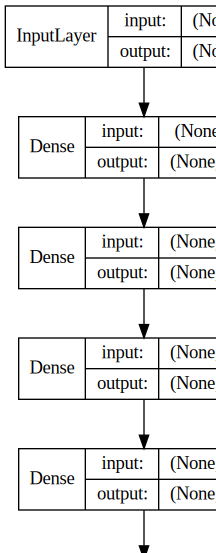

In [182]:
# Building the model
nn9 = models.Sequential()
nn9.add(layers.Dense(128, input_shape=(X_train_minmax.shape[1],), kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn9.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn9.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn9.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn9.add(layers.Dense(1024, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn9.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn9.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn9.summary())

# Visualising the neural network
SVG(model_to_dot(nn9, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

In [183]:
# Training the model
nn9_start = time.time()

nn9_history = nn9.fit(X_train_minmax,
                  y_train_minmax,
                  epochs=80,
                  batch_size=256,
                  validation_split = 0.1)

nn9_end = time.time()

print(f"Time taken to run: {round((nn9_end - nn9_start)/60,1)} minutes")

Train on 3691 samples, validate on 411 samples
Epoch 1/80
3691/3691 [==============================] - 10s 3ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 2/80
3691/3691 [==============================] - 2s 612us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 3/80
3691/3691 [==============================] - 2s 505us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 4/80
3691/3691 [==============================] - 3s 812us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 5/80
3691/3691 [==============================] - 3s 694us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 6/80
3691/3691 [==============================] - 2s 565us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 7/80
3691/3691 [========

In [184]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
import joblib

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

def decompose_time_series(df, title=''):
    """
    Plots the original time series and its decomposition into trend, seasonal and residual.
    """
    # Decomposing the time series
    decomposition = seasonal_decompose(df)
    
    # Getting the trend, seasonality and noise
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    # Plotting the original time series and the decomposition
    plt.figure(figsize=(12,8))
    plt.suptitle(title, fontsize=14, y=1)
    plt.subplots_adjust(top=0.80)
    plt.subplot(411)
    plt.plot(df, label='Original')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='upper left')
    plt.tight_layout()

decompose_time_series(ts_host_since, title='Number of hosts joining Airbnb each month')

In [84]:
df.head()

,experiences_offered,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68951,none,2011-01-10,within a few hours,100%,t,1,t,t,Bolton District,House,Entire home/apt,4,1.0,2.0,6.0,Real Bed,"{TV,Wifi,Kitchen,""Free street parking"",""Indoor...",$65.00,$150.00,$25.00,4,$10.00,2,180,t,0,0,0,136,82,2012-03-12,2019-10-03,97.0,10.0,9.0,10.0,10.0,9.0,9.0,f,f,f,strict_14_with_grace_period,f,t
85109,none,2011-03-27,within an hour,100%,t,4,t,t,City Centre,Apartment,Private room,2,1.5,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",$60.00,$0.00,$0.00,2,$0.00,2,14,t,30,60,88,355,434,2011-05-02,2020-03-16,97.0,10.0,10.0,10.0,10.0,10.0,9.0,f,f,f,strict_14_with_grace_period,f,f
157612,none,2011-06-29,within a few hours,90%,t,3,t,f,Salford District,Loft,Entire home/apt,3,1.0,2.0,2.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",$34.00,$150.00,$20.00,1,$14.00,2,365,t,9,21,47,322,96,2012-02-13,2019-12-08,98.0,10.0,10.0,10.0,10.0,9.0,10.0,f,f,f,moderate,t,t
159189,none,2011-06-30,NaN,NaN,f,1,t,f,Rochdale District,House,Shared room,2,1.0,1.0,2.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",$55.00,$100.00,NaN,1,$30.00,1,3,t,30,60,90,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,f,flexible,f,f
283495,none,2011-12-06,within a few hours,100%,f,1,t,f,Rochdale District,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Free parking on p...",$60.00,NaN,NaN,1,$0.00,3,1125,t,0,0,0,240,10,2015-04-26,2018-08-05,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,flexible,f,f


In [98]:
#print("Average number of listings per host per year on Airbnb in London:")
#print(round(df.set_index('host_since').host_listings_count.resample('YS').mean(),2))

## response time

In [87]:
print("Null values:", df.host_response_time.isna().sum())
print(f"Proportion: {round((df.host_response_time.isna().sum()/len(df))*100, 1)}%")

Null values: 1073
Proportion: 20.9%


In [97]:
# Number of rows without a value for host_response_time which have also not yet had a review
#len(df[df.loc[ :,['host_response_time ', 'first_review'] ].isnull().sum(axis=1) == 2])

In [242]:
numerical_columns

['accommodates',
 'bathrooms',
 'cleaning_fee',
 'extra_people',
 'host_listings_count',
 'maximum_nights',
 'minimum_nights',
 'number_of_reviews',
 'price',
 'security_deposit']

In [243]:
transformed_df

,id,host_is_superhost,host_listings_count,host_identity_verified,accommodates,bathrooms,price,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,availability_90,number_of_reviews,instant_bookable,host_days_active,check_in_24h,air_conditioning,balcony,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,child_friendly,parking,outdoor_space,host_greeting,internet,long_term_stays,pets_allowed,private_entrance,self_check_in,time_since_last_review,host_response_time_a few days or more,host_response_time_unknown,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_rate_100%,host_response_rate_50-89%,host_response_rate_90-99%,borough_Ancoats and Clayton,borough_Ardwick,borough_Baguley,borough_Bolton District,borough_Bradford,borough_Brooklands,borough_Burnage,borough_Bury District,borough_Charlestown,...,borough_Hulme,borough_Levenshulme,borough_Longsight,borough_Miles Platting and Newton Heath,borough_Moss Side,borough_Moston,borough_Northenden,borough_Old Moat,borough_Oldham District,borough_Rochdale District,borough_Rusholme,borough_Salford District,borough_Sharston,borough_Stockport District,borough_Tameside District,borough_Trafford District,borough_Whalley Range,borough_Wigan District,borough_Withington,borough_Woodhouse Park,property_type_House,property_type_Other,room_type_Entire home/apt,room_type_Shared room,review_scores_rating_0-79/100,review_scores_rating_80-94/100,review_scores_rating_95-100/100,review_scores_accuracy_0-8/10,review_scores_accuracy_10/10,review_scores_accuracy_9/10,review_scores_cleanliness_0-8/10,review_scores_cleanliness_10/10,review_scores_cleanliness_9/10,review_scores_checkin_0-8/10,review_scores_checkin_10/10,review_scores_checkin_9/10,review_scores_communication_0-8/10,review_scores_communication_10/10,review_scores_communication_9/10,review_scores_location_0-8/10,review_scores_location_10/10,review_scores_location_9/10,review_scores_value_0-8/10,review_scores_value_10/10,review_scores_value_9/10,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,time_since_first_review_0-6 months,time_since_first_review_1-2 years,time_since_first_review_2-3 years,time_since_first_review_4+ years,time_since_first_review_6-12 months
0,68951,1,0.000000,1,1.386294,0.000000,4.174387,5.010635,3.218876,2.302585,0.693147,5.192957,0,4.406719,0,3011.0,NaN,NaN,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,200.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
1,85109,1,1.386294,1,0.693147,0.405465,4.094345,-4.605170,-4.605170,-4.605170,0.693147,2.639057,88,6.073045,0,2935.0,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,35.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
2,157612,1,1.098612,0,1.098612,0.000000,3.526361,5.010635,2.995732,2.639057,0.693147,5.899897,47,4.564348,0,2841.0,1.0,NaN,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,134.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
3,159189,0,0.000000,0,0.693147,0.000000,4.007333,4.605170,-4.605170,3.401197,0.000000,1.098612,90,-4.605170,0,2840.0,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,283495,0,0.000000,0,0.693147,0.000000,4.094345,-4.605170,-4.605170,-4.605170,1.098612,7.025538,0,2.302585,0,2681.0,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,624.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,